In [1]:
#This notebook is intended for automatic analysis of simulation and fit data from geiv


In [2]:
#important libraries and modules
import datetime
import math
import sys
import os
import re
import time


import array
from   matplotlib import pyplot
import numpy

import ROOT

from   printVal   import printVal


from printVal      import printVal
from getA          import getA
from readGDF       import readGDF
from getRatioError import getRatioError
from ra226BR       import *

Welcome to JupyROOT 6.26/08
Pb-214 to Ra-226 BR: 0.999800 +/- 0.000020	
Bi-214 to Ra-226 BR: 0.9997900419579999


In [3]:
pyplot.rcParams["figure.figsize"]=[12,8]
pyplot.rcParams["figure.dpi"]=200

In [4]:
#directory where fitted data and simulated data files, corresponding gdfs are stored
total_simulation='25M'
number_of_sim_files=25

isotopes=['am241','pb210','ra226'] #isotopes in simulation

root_path=f'/home/thakur/geivanalysis'
source_dir=f'geiv_cornercorner1122'
nugdf_path='/home/thakur/mylab/ryanfiles/nugdf'

data_suffix=f'_cornercorner_{total_simulation}'



dest_dir=f'my_test'  #Where to save the results


dest_path=f'{root_path}/{dest_dir}'

In [5]:
#check if direcotry
source_path=os.path.join(root_path,source_dir)


if os.path.isdir(source_path):
    print(f"{source_path} .. proceeding ...")
else:
    print(f"{source_path}...doesn't exeed ... !")

/home/thakur/geivanalysis/geiv_cornercorner1122 .. proceeding ...


In [6]:
#checking the *.dat inside source path
! ls -lt "{source_path}" | grep '.dat$'

-rw-rw-r-- 1 thakur thakur    218 Nov 13 13:23 source_correction_cornercorner1122_25M.dat
-rw-rw-r-- 1 thakur thakur   5726 Nov 13 12:58 correction_geiv_cornercorner1122_25M.dat
-rw-rw-r-- 1 thakur thakur   7506 Nov 13 12:22 sim_geiv_cornercorner1122_25M.dat
-rw-rw-r-- 1 thakur thakur   8825 Nov 13 09:15 data_geiv_cornercorner1122_25M.dat
-rw-rw-r-- 1 thakur thakur  11777 Nov 11 23:10 ra226_data_bgrates_cornercorner.dat
-rw-rw-r-- 1 thakur thakur  11777 Nov 11 23:09 bgrates.dat
-rw-rw-r-- 1 thakur thakur   2003 Nov 11 22:54 pb210_data_bgrates_cornercorner.dat
-rw-rw-r-- 1 thakur thakur   2727 Nov 11 22:40 am241_data_bgrates_cornercorner.dat
-rw-rw-r-- 1 thakur thakur  11596 Nov 11 22:20 ra226_sim_bgrates_cornercorner_25M.dat
-rw-rw-r-- 1 thakur thakur    374 Nov 11 22:14 pb210_sim_bgrates_cornercorner_25M.dat
-rw-rw-r-- 1 thakur thakur    555 Nov 11 21:40 am241_sim_bgrates_cornercorner_25M.dat
-rw-rw-r-- 1 thakur thakur 119978 Nov 11 21:32 pb210sim.dat
-rw-rw-r-- 1 thakur thakur 130358

In [7]:
#checking *.gdf inside source path
! ls -lt "{source_path}" | grep 'sim.dat'

-rw-rw-r-- 1 thakur thakur 119978 Nov 11 21:32 pb210sim.dat
-rw-rw-r-- 1 thakur thakur 130358 Nov 11 21:32 ra226sim.dat
-rw-rw-r-- 1 thakur thakur 120087 Nov 11 21:32 am241sim.dat


In [8]:
#checking *.gdf inside source path
! ls -lt "{source_path}" | grep '.gdf'

-rw-rw-r-- 1 thakur thakur 144312 Nov 11 23:09 ra226.gdf
-rw-rw-r-- 1 thakur thakur 144312 Nov 11 22:53 pb210.gdf
-rw-rw-r-- 1 thakur thakur 144312 Nov 11 22:39 am241.gdf
-rw-rw-r-- 1 thakur thakur 144312 Nov 11 22:18 ra226sim.gdf
-rw-rw-r-- 1 thakur thakur 144312 Nov 11 22:13 pb210sim.gdf
-rw-rw-r-- 1 thakur thakur 144312 Nov 11 21:36 am241sim.gdf
-rw-rw-r-- 1 thakur thakur 144312 Nov  7 18:58 pb2102.gdf
-rw-rw-r-- 1 thakur thakur 144312 Nov  7 18:57 am2412.gdf
-rw-rw-r-- 1 thakur thakur 144312 Nov  7 18:55 ra2262.gdf
-rw-rw-r-- 1 thakur thakur 144312 Oct 24 18:38 naturals.gdf
-rw-rw-r-- 1 thakur thakur  56143 Oct 24 18:38 newgeflyash.gdf
-rw-rw-r-- 1 thakur thakur  36173 Oct 24 18:38 default.gdf


In [9]:
#checking *.mac inside source path
! ls -lt "{source_path}" | grep '.mac'

-rw-rw-r-- 1 thakur thakur   1152 Nov 11 03:11 am241_cornercorner_25M.mac
-rw-rw-r-- 1 thakur thakur   1152 Nov 11 03:11 pb210_cornercorner_25M.mac
-rw-rw-r-- 1 thakur thakur   1111 Nov 11 03:11 ra226_cornercorner_25M.mac
-rw-rw-r-- 1 thakur thakur   3845 Nov 10 22:11 macfiles.zip
-rw-rw-r-- 1 thakur thakur   1143 Nov  9 02:49 pb210.mac
-rw-rw-r-- 1 thakur thakur   1102 Nov  9 02:49 ra226.mac
-rw-rw-r-- 1 thakur thakur   1143 Nov  8 21:49 am241.mac


In [10]:
#checking if the destination dir exists otherwise creating it
dest_path=os.path.join(root_path,dest_dir)

if os.path.isdir(dest_path):
    print(f"{dest_path} .. proceeding ...")
else:
    print(f"{dest_path}...doesn't exist ... creating it !")
    os.mkdir(f'{dest_path}')

/home/thakur/geivanalysis/my_test .. proceeding ...


# READ DATA FILE

In [11]:
def getRunTimes(datFile):
    """
    reads the 3rd and 4th line of the data file which is obtained from Chn files and returns start and end time
    The form of lines which getRunTimes reads:
    Run started....................:  Fri Feb 14 10:22:43 2020
       in time zone.................:  CST
       in time since epoch..........:  1581697363 s
     Run  time......................:         251.90 s
     Live time......................:         251.52 s
     Number of data channels........:       16384
    """
    print(f"Reading the file: {datFile}\n")
    command=f'head {datFile}'
    print(f'head of {datFile}')
    os.system(command)
    #print('head of {datFile}\n{os.system(command)}\n')
    file = open(datFile, 'r')
    lines = file.readlines()
    #readline reads a whole file in a go and store in the form of list of strings.
    start =           int(lines[2].split()[-2])
    end   = start + float(lines[3].split()[-2])
    print(f"\nstart time: {start}")
    print(f"end time  : {end}\n")
    return [start, end]


def check_file(f):
    #check if file exist exit otherwise
    if os.path.isfile:
        print(f'file: {f} exists ... processing ...\n')
    else:
        print(f'file: {f} doesnot exist ... exiting  ...\n')
        sys.exit(1)


In [12]:

geiv_data_file="data.dat"       #combined combined data is saved in this file
geiv_sim_file='sim.dat'         #combined simulation are collected here
geiv_corr_file='correction.dat' #combined correction data are collected here
geiv_source_corr_file='source_correction.dat' #source correction for plotcorrection

# def getRunTimes(datFile):
#     """
#     reads the 3rd and 4th line of the data file which is obtained from Chn files and returns start and end time
#     """
#     print(f"Reading the file: {datFile}")
#     file = open(datFile, 'r')
#     lines = file.readlines()
#     #readline reads a whole file in a go and store in the form of list of strings.
#     start =           int(lines[2].split()[-2])
#     end   = start + float(lines[3].split()[-2])
#     print(f"start time: {start}\n")
#     print(f"end time  : {end}\n")
#     return [start, end]




#epoch->Jan 01,1970 (also called unix time, posix time)


#Example input:
#./data.py co60 ~/ge4/ana/2020/effcal/02-14/door/dat/co60.dat co60.gdf ~/ge4/gdf/co60/co60.gdf

def create_data_file(parent,datFile,gdfFile,gdfFile0):
    
    """
        It results a single data file for a given isotopes
        parenet:ne of isotopes
        datFile:data file obtained from the conversion of Chn to dat with chn2dat function. It is for start and end time
        gdfFile:It is file which is fits the given data file with convergence of 3
        gdfFile0:original gdf file produced from nudat2
    """
    # parent   = sys.argv[1]
    # datFile  = sys.argv[2] #data file obtained for the corresponding Chn file->gives start and end time
    # gdfFile  = sys.argv[3] #gdf file which best fits the data file
    # gdfFile0 = sys.argv[4] #original gdf file 

    [start, end] = getRunTimes(datFile) #start,end time

    [A, dA, minus, plus] = getA(parent,
                                  datetime.datetime.fromtimestamp(start, datetime.timezone.utc),
                                  datetime.datetime.fromtimestamp(end,   datetime.timezone.utc) )

    #datetime.fromtimestamp(ts) converts "seconds since the epoch" to a naive datetime object that represents local time. tzinfo is always None in this case.
    #getA is getting activities based on the source certificates and start and end time

    isotopes = [[ parent, 1 ]]
    if   parent == 'eu152' or parent == 'Eu152' or parent == 'Eu-152':
        isotopes = [
            ['eu152b', 27.92e-2, 13e-4 ],
            ['eu152e', 72.08e-2, 13e-4 ]
        ]
    elif parent == 'ra226' or parent == 'Ra226' or parent == 'Ra-226':
        isotopes = [
            [ 'ra226', 1 ],
            [ 'pb214', pb214br ],
            [ 'bi214', bi214br ],
            [ 'pb210', pb210br ]
        ]

    # Read all gamma-ray data for this source.
    [livetime, data]  = readGDF( gdfFile,  isotopes )
    # Need to get B.R. error from original gdf file. gdfit sets it to sqrt(2).
    [livetime, data2] = readGDF( gdfFile0, isotopes )
    for d in data:
        for d2 in data2:
            if d2[0] == d[0]:
                d[2] = d2[2]
                break
        if d[2] == 0:
            print( 'Warning:',d[0],'keV branching ratio has no error.' )

    print(f"\nOpening and reading the file: {geiv_data_file}\n")
    file = open(geiv_data_file,'a')
    for d in data:
        if d[4] > 0: # gamma line was fit
            if d[3]/d[4] >= 3: # number of sigma measurement
                print( '' )
                # Get observed source activity implied by activity of this transition and its B.R.
                print( 'Observed activity.....:', d[0], d[3]/d[1], d[4]/d[1], 'Bq' )# fit rate/B.R. of gamma
                print( '               or.....:', d[0], printVal(d[3]/d[1], d[4]/d[1]), 'Bq' )

                # Divide the observed activity by the source activity to get efficiency.
                eff = d[3]/d[1]/A
                lo  = d[4]/d[3] * eff
                hi  = lo
                #[lo, hi] = getRatioError(d[3]/d[1], d[4]/d[1], d[4]/d[1], A, 0, 0)
                #lo = eff - lo
                #hi = hi - eff
                # Print observed efficiency (observed activity/source activity).
                print( 'Observed efficiency...:', eff, '+', hi, '/-', lo    )
                print( '                 or...:', printVal(eff, (lo+hi)/2 ) )

                file.write( '{:6s} {:6s} {:.4f} {:e} {:e} {:e} {:e} {:e} {:e} {:e} {:e} {:e} {:e} {:e}\n'.format(parent,
                                                                                                                 d[-1], d[0],
                                                                                                                 eff, lo, hi,
                                                                                                                 A, dA, minus, plus,
                                                                                                                 d[1], d[2], d[3], d[4]) )
                #print("parent\t d[-1]d[0]\teff\tlo\thi\tA\tdA\tminus\tplus\n")
                #print("DATA FILE INFORMATION:\n")
                #print( 'parent->{:6s}\td[-1]-> {:6s}\td[0]-> {:.4f}\teff-> {:e}\tlo-> {:e}\thi-> {:e}\tA-> {:e}\tdA-> {:e}\tminus-> {:e}\tplus-> {:e}\t d[1]->{:e}\td[2]-> {:e}\td[3]-> {:e}\td[4]-> {:e}\n'.format(parent,
                                                                                                                 # d[-1], d[0],
                                                                                                                 # eff, lo, hi,
                                                                                                                 # A, dA, minus, plus,
                                                                                                                 # d[1], d[2], d[3], d[4]) )

    file.close()


#Example input:
#./sim.py co60 ~/gesim/sources/door/co60.mac co60sim.gdf ~/ge4/gdf/co60/co60.gdf

def create_sim_file(parent,macFile,gdfFile,gdfFile0,number_of_sim_files=number_of_sim_files):
    """
    creates a single simulation datafile
    parent:isotope
    macFile:macfile which stores simulation info
    gdfFile:gdfFile which fits simulation data
    gdfFile0: from nugdf
    """

    no_of_files=number_of_sim_files

    print(f"""
    parent      : {parent}
    macFile     : {macFile}
    gdfFile     : {gdfFile}
    dfFile0     : {gdfFile0}
    sim_files#  : {no_of_files}
    """)
    
    # Get number of simulated events from Geant4 mac file.
    file = open(macFile, "r")
    for line in file:
        # This should find the last line that begins with (not commented out) beamOn.
        if re.search('^/run/beamOn', line):
            N = int( line.split()[1] )
            print("N in a mac file:   {}".format(N))
            #changing N for given files
            print("Number of simulation files: {}".format(no_of_files))
            N=no_of_files*N
            print("N in a simulation: {}".format(N))
            print(f"or N: {N/1e6} M\n")

    isotopes = [[ parent, 1 ]]
    if   parent == 'eu152' or parent == 'Eu152' or parent == 'Eu-152':
        isotopes = [
            ['eu152b', 27.92e-2, 13e-4 ],
            ['eu152e', 72.08e-2, 13e-4 ]
        ]
    elif parent == 'ra226' or parent == 'Ra226' or parent == 'Ra-226':
        isotopes = [
            [ 'ra226', 1 ],
            [ 'pb214', pb214br ],
            [ 'bi214', bi214br ],
            [ 'pb210', pb210br ]
        ]

    # Read all gamma-ray data for this source.
    [livetime, data]  = readGDF( gdfFile, isotopes)
    # Need to get B.R. error from original gdf file. gdfit sets it to sqrt(2).
    [dummy,    data2] = readGDF( gdfFile0, isotopes )
    for d in data:
        for d2 in data2:
            if d2[0] == d[0]:
                d[2] = d2[2]
                break
        if d[2] == 0:
            print( 'Warning:',d[0],'keV branching ratio has no error.' )

    print("OPEANING and READING sim.dat")
    file = open(geiv_sim_file,'a')
    for d in data:
        if d[4] > 0: # gamma line was fit
            if d[3]/d[4] >= 3: # 3 sigma measurement
                eff = d[3]/d[1]*livetime/N
                lo  = d[4]/d[1]*livetime/N/eff
                lo  = math.sqrt( lo*lo + d[2]*d[2]/(d[1]*d[1]) )
                lo *= eff
                hi  = lo
                print( 'Number simulated......: ', N )
                print( "Simulated efficiency..:", eff, '+', hi, '/-', lo )
                print( "                  or..:", printVal(eff, (lo+hi/2)) )

                file.write( '{:6s} {:6s} {:.4f} {:e} {:e} {:e} {:d} {:e} {:e} {:e} {:e} {:e}\n'.format(parent,
                                                                                                 d[-1], d[0],
                                                                                                 eff, hi, lo,
                                                                                                 N, livetime,
                                                                                                 d[1], d[2], d[3], d[4]) )
                #print( 'parent->{:6s}\td[-1]-> {:6s}\td[0]-> {:.4f}\teff-> {:e}\thi-> {:e}\tlow-> {:e}\tN-> {:d}\tlivetime-> {:e}\td[1]-> {:e}\td[2]-> {:e}\td[3]-> {:e}\td[4]->{:e}\n'.format(parent,
                                                                                                 # d[-1], d[0],
                                                                                                 # eff, hi, lo,
                                                                                                 # N, livetime,
                                                                                                 # d[1], d[2], d[3], d[4]) )

    file.close()



def get_correction_data(parent,combined_data_file,combined_sim_file):
    """
    returns correction for given parent 
    parent: isotope
    combined_data_file: file which stores data for all the isotopes
    
    """
 
    print(f"""
    parent            : {parent}
    combined_data_file: {combined_data_file}
    combined_sim_file : {combined_sim_file}
    """)
    
    #check if file exist
    
    check_file(combined_data_file)
    check_file(combined_sim_file)


    skips = []
    file = open('skip.dat', 'r')
    for line in file:
        if line[0] == '#':
            continue
        print('skipping',line.split()[0:2])
        skips.append(line.split()[0:2])


    data = []
    #################################################################
    file = open(combined_data_file, 'r')             #remember the data file
    for line in file:
        words = line.split()
        if words[0] != parent:
            continue
        id = [ words[0],        # parent
               words[2] ]       # energy
        skip = False
        for s in skips:
            if id == s:
                skip = True
        if not skip:
            data.append([
                [ words[0],         # 0: parent
                  words[1] ],       # 0: daughter
                float(words[ 2]),   # 1: energy
                float(words[ 6]),   # 2: source activity (decayed)
                float(words[ 7]),   # 3: uncertainty in source activity
                float(words[ 8]),   # 4: total activity error (minus)
                float(words[ 9]),   # 5: total activity error (plus)
                float(words[10]),   # 6: branching ratio
                float(words[11]),   # 7: error
                float(words[12]),   # 8: rate
                float(words[13]) ]) # 9: error
    for entry in reversed(range(len(data))):
        for e in range(entry):
            # If this entry's isotope and energy match a later one, then remove it.
            if data[e][0] == data[entry][0] and data[e][1] == data[entry][1]:
                data.remove(data[e])
                break



    # Read all entries from sim.dat,
    # then remove earlier superseeded entries.
    sim = []

    print("simulated file name:\t",combined_sim_file)
    file = open(combined_sim_file, 'r')
    for line in file:
        words = line.split()
        if words[0] != parent:
            continue
        sim.append([
            [ words[0],         # 0: isotope
              words[1] ],       # 0: isotope
            float(words[ 2]),   # 1: energy
            int(  words[ 6]),   # 2: number generated
            float(words[ 7]),   # 3: livetime assumed by GDFit
            float(words[ 8]),   # 4: branching ratio
            float(words[ 9]),   # 5: error
            float(words[10]),   # 6: rate
            float(words[11]) ]) # 7: error
    for entry in reversed(range(len(sim))):
        for e in range(entry):
            # If this entry's isotope and energy match a later one, then remove it.
            if sim[e][0] == sim[entry][0] and sim[e][1] == sim[entry][1]:
                sim.remove(sim[e])
                break



    # Confirm each gamma-ray appears in both the data and simulation analysis.
    for s in reversed(range(len(sim))):
        found = False
        for d in range(len(data)):
            if data[d][0] == sim[s][0] and data[d][1] == sim[s][1]:
                found = True
                break
        if not found:
            print( 'Warning: '+sim[s][0][1],sim[s][1],'keV gamma-ray not found in data.')
            sim.remove(sim[s])

    for d in range(len(data)):
        found = False
        for s in range(len(sim)):
            if data[d][0] == sim[s][0] and data[d][1] == sim[s][1]:
                found = True
                data[d].append(sim[s])
                if (sim[s][4] != data[d][6] and sim[s][5] != data[d][7]):
                    print('Warning: '+sim[s][0][1],sim[s][1],'keV gamma-ray branching ratio/error differs.')
                break
        if not found:
            print( 'Error: '+data[d][0][1],data[d][1],'keV gamma-ray not found in simulation.')
            data.remove(data[d])
            exit(-1)

    print(20*"==")
    #print(f"Correction File: {corr_file}\n")
    file = open('correction.dat','a')
    for d in data:
        # Get the error on the ratio by simulation.
        A        = d[2]
        dA       = d[3]
        lo       = d[4]
        hi       = d[5]
        br       = d[6]
        ebr      = d[7]
        r        = d[8]
        er       = d[9]
        N        = d[-1][2]
        livetime = d[-1][3]
        s        = d[-1][6]
        es       = d[-1][7]
        num      = N/livetime*r
        enum     = N/livetime*er
        denom    = A*s
        # Branching ratio cancels in the data/simulation ratio.
        # But the simulation uses some branching ratio so add it to the
        # simulation 'rate' (in the denominator).
        edenom   = ebr*ebr/(br*br) + es*es/(s*s) # temporary value
        A2       = A*A
        [ minus1, plus1 ] = getRatioError( num, enum, enum,
                                           denom,
                                           denom*math.sqrt( lo*lo/A2 + edenom ),
                                           denom*math.sqrt( hi*hi/A2 + edenom ) )
        [ minus2, plus2 ] = getRatioError( num, enum, enum,
                                           denom,
                                           denom*math.sqrt(            edenom ),
                                           denom*math.sqrt(            edenom ) )
        c = num/denom
        print( 'Efficiency correction.:', c,
               '+',  plus1 - c,
               '/-', c - minus1 )
        print( '                   or.:', printVal( c, (plus1-minus1)/2 ) )

        file.write( '{:6s} {:6s} {:.4f} {:e} {:e} {:e} {:e} {:e} {:e} {:e}\n'.format(d[0][0], d[0][1], d[1], c, c-minus1, plus1-c, c-minus2, plus2-c, lo/A, hi/A) )
    file.close()


# GET A SINGLE DATA FILE 

In [13]:

for isotope in isotopes:
    parent=isotope
    data_file=os.path.join(source_path,f'{isotope}.dat')
    gdf_file=os.path.join(source_path,f'{isotope}.gdf')
    gdf_file0=os.path.join(nugdf_path,f'{isotope}.gdf')
    
    print(f'''
    parent   : {parent}
    parent   : {data_file}
    gdf_file : {gdf_file}
    gdf_file0: {gdf_file0}
''')
    #run file
    create_data_file(parent,data_file,gdf_file,gdf_file0)


    parent   : am241
    parent   : /home/thakur/geivanalysis/geiv_cornercorner1122/am241.dat
    gdf_file : /home/thakur/geivanalysis/geiv_cornercorner1122/am241.gdf
    gdf_file0: /home/thakur/mylab/ryanfiles/nugdf/am241.gdf

Reading the file: /home/thakur/geivanalysis/geiv_cornercorner1122/am241.dat

head of /home/thakur/geivanalysis/geiv_cornercorner1122/am241.dat

start time: 1700682361
end time  : 1700683230.22

Start time of experiemntal data: 178098361.0
End time of experiemntal data: 178099230.22
Working for the id: am241

A->	 38450.48837223798
dA->	 576.7573255835697
Average source activity.......: 38450.48837223798 + 576.4308701389948 /- 578.9708171972418 Bq
                     or.......: 38450.48837223798 +/- 576.7573255835697 Bq
                     or.......: 38500 +/- 600	 Bq
Reading the gef file: /home/thakur/geivanalysis/geiv_cornercorner1122/am241.gdf to read the data!!!

norm: 8
parent: 1.0
lt: 868.5800170898
Reading the gef file: /home/thakur/mylab/ryanfiles/nugd

In [14]:
! cat data.dat

am241  am241  59.5409 4.623026e-04 6.556932e-06 6.556932e-06 3.845049e+04 5.767573e+02 5.789708e+02 5.764309e+02 3.590000e-01 4.000000e-03 6.381498e+00 9.051009e-02
pb210  pb210  46.5390 4.035214e-05 5.694277e-06 5.694277e-06 1.827581e+05 3.655163e+03 3.680978e+03 3.663551e+03 4.250000e-02 4.000000e-04 3.134240e-01 4.422871e-02
ra226  ra226  186.2110 6.056188e-03 1.805048e-04 1.805048e-04 2.962743e+04 4.444114e+02 -4.435244e+02 -4.456804e+02 3.640000e-02 4.000000e-04 6.531225e+00 1.946633e-01
ra226  pb214  241.9950 5.595130e-03 1.024783e-04 1.024783e-04 2.962743e+04 4.444114e+02 -4.435244e+02 -4.456804e+02 7.251000e-02 1.600000e-04 1.201993e+01 2.201526e-01
ra226  pb214  258.8600 3.681478e-03 7.636271e-04 7.636271e-04 2.962743e+04 4.444114e+02 -4.435244e+02 -4.456804e+02 5.310000e-03 4.000000e-05 5.791761e-01 1.201351e-01
ra226  pb214  274.8000 7.679431e-03 1.070834e-03 1.070834e-03 2.962743e+04 4.444114e+02 -4.435244e+02 -4.456804e+02 3.550000e-03 1.000000e-04 8.077022e-01 1.126275e-0

In [15]:
#copy data into the destination path
copy_data_command=f'mv -v data.dat {dest_path}/data{data_suffix}.dat'
#print(copy_data_command)
os.system(copy_data_command)

0

renamed 'data.dat' -> '/home/thakur/geivanalysis/my_test/data_cornercorner_25M.dat'


# GET A SINGLE SIMULATION FILE

In [16]:

for isotope in isotopes:
    parent=isotope
    data_file=os.path.join(source_path,f'{isotope}sim.dat')
    gdf_file=os.path.join(source_path,f'{isotope}sim.gdf')
    mac_file=os.path.join(source_path,f'{isotope}{data_suffix}.mac')
    gdf_file0=os.path.join(nugdf_path,f'{isotope}.gdf')
    
    print(f'''
    parent   : {parent}
    sim_data : {data_file}
    gdf_file : {gdf_file}
    mac_file : {mac_file}
    gdf_file0: {gdf_file0}
''')
    #run file
    create_sim_file(parent,mac_file,gdf_file,gdf_file0)


    parent   : am241
    sim_data : /home/thakur/geivanalysis/geiv_cornercorner1122/am241sim.dat
    gdf_file : /home/thakur/geivanalysis/geiv_cornercorner1122/am241sim.gdf
    mac_file : /home/thakur/geivanalysis/geiv_cornercorner1122/am241_cornercorner_25M.mac
    gdf_file0: /home/thakur/mylab/ryanfiles/nugdf/am241.gdf


    parent      : am241
    macFile     : /home/thakur/geivanalysis/geiv_cornercorner1122/am241_cornercorner_25M.mac
    gdfFile     : /home/thakur/geivanalysis/geiv_cornercorner1122/am241sim.gdf
    dfFile0     : /home/thakur/mylab/ryanfiles/nugdf/am241.gdf
    sim_files#  : 25
    
N in a mac file:   1000000
Number of simulation files: 25
N in a simulation: 25000000
or N: 25.0 M

Reading the gef file: /home/thakur/geivanalysis/geiv_cornercorner1122/am241sim.gdf to read the data!!!

norm: 8
parent: 1.0
lt: 10000.0
Reading the gef file: /home/thakur/mylab/ryanfiles/nugdf/am241.gdf to read the data!!!

norm: 8
lt: 973974.7
OPEANING and READING sim.dat
Number simulate

In [17]:
! cat sim.dat

am241  am241  59.5409 1.551570e-03 2.351238e-05 2.351238e-05 25000000 1.000000e+04 3.590000e-01 4.000000e-03 1.392534e+00 1.430288e-02
pb210  pb210  46.5390 3.246814e-04 1.980360e-05 1.980360e-05 25000000 1.000000e+04 4.250000e-02 4.000000e-04 3.449740e-02 2.078932e-03
ra226  ra226  186.2110 7.242008e-03 1.622728e-04 1.622728e-04 25000000 1.000000e+04 3.640000e-02 4.000000e-04 6.590228e-01 1.286905e-02
ra226  pb214  241.9950 7.017125e-03 7.925401e-05 7.925401e-05 25000000 1.000000e+04 7.251000e-02 1.600000e-04 1.272029e+00 1.408991e-02
ra226  pb214  258.8600 5.776077e-03 5.460583e-04 5.460583e-04 25000000 1.000000e+04 5.310000e-03 4.000000e-05 7.667743e-02 7.225875e-03
ra226  pb214  274.8000 6.863920e-03 7.764276e-04 7.764276e-04 25000000 1.000000e+04 3.550000e-03 1.000000e-04 6.091729e-02 6.673715e-03
ra226  pb214  295.2228 6.324301e-03 4.085751e-05 4.085751e-05 25000000 1.000000e+04 1.842000e-01 4.000000e-04 2.912341e+00 1.772013e-02
ra226  pb214  351.9321 5.728802e-03 2.798602e-05 2

In [18]:
#copy data into the destination path
copy_data_command=f'mv -v sim.dat {dest_path}/sim{data_suffix}.dat'
#print(copy_data_command)
os.system(copy_data_command)

0

renamed 'sim.dat' -> '/home/thakur/geivanalysis/my_test/sim_cornercorner_25M.dat'


# GET A SINGLE COMBINED FILE

In [19]:
#
combined_data_file=f'{dest_path}/data{data_suffix}.dat'
combined_sim_file=f'{dest_path}/sim{data_suffix}.dat'
print(f'''
combined_data_file: {combined_data_file}
combined_sim_file : {combined_sim_file}
''')


combined_data_file: /home/thakur/geivanalysis/my_test/data_cornercorner_25M.dat
combined_sim_file : /home/thakur/geivanalysis/my_test/sim_cornercorner_25M.dat



In [20]:
for iso in isotopes:
    get_correction_data(iso,combined_data_file,combined_sim_file)


    parent            : am241
    combined_data_file: /home/thakur/geivanalysis/my_test/data_cornercorner_25M.dat
    combined_sim_file : /home/thakur/geivanalysis/my_test/sim_cornercorner_25M.dat
    
file: /home/thakur/geivanalysis/my_test/data_cornercorner_25M.dat exists ... processing ...

file: /home/thakur/geivanalysis/my_test/sim_cornercorner_25M.dat exists ... processing ...

skipping ['co60', '347.14']
skipping ['co60', '826.10']
skipping ['co60', '2158.57']
skipping ['ra226', '46.5390']
skipping ['ra226', '53.2284']
skipping ['ra226', '785.9600']
skipping ['ra226', '786.3500']
skipping ['ra226', '806.1800']
skipping ['ra226', '1599.3700']
skipping ['ra226', '2293.38']
skipping ['eu152', '867.38']
skipping ['ba133', '79.6142']
skipping ['ba133', '80.9979']
simulated file name:	 /home/thakur/geivanalysis/my_test/sim_cornercorner_25M.dat
Efficiency correction.: 0.2979579377815683 + 0.007566586071068082 /- 0.007714860422351366
                   or.: 0.298 +/- 0.008	

    parent

In [21]:
! cat correction.dat

am241  am241  59.5409 2.979579e-01 7.714860e-03 7.566586e-03 6.209742e-03 6.119805e-03 1.505757e-02 1.499151e-02
pb210  pb210  46.5390 1.242823e-01 1.953526e-02 1.896753e-02 1.940225e-02 1.881491e-02 2.014126e-02 2.004590e-02
ra226  ra226  186.2110 8.362579e-01 3.392222e-02 3.324966e-02 3.148058e-02 3.086186e-02 -1.497006e-02 -1.504283e-02
ra226  pb214  241.9950 7.973536e-01 2.104061e-02 2.073213e-02 1.725877e-02 1.709342e-02 -1.497006e-02 -1.504283e-02
ra226  pb214  258.8600 6.373663e-01 1.486346e-01 1.418692e-01 1.482157e-01 1.417544e-01 -1.497006e-02 -1.504283e-02
ra226  pb214  274.8000 1.118811e+00 2.065195e-01 1.907408e-01 2.053937e-01 1.901653e-01 -1.497006e-02 -1.504283e-02
ra226  pb214  295.2228 8.463226e-01 1.613849e-02 1.584655e-02 9.723131e-03 9.741383e-03 -1.497006e-02 -1.504283e-02
ra226  pb214  351.9321 8.473181e-01 1.465328e-02 1.437635e-02 7.000378e-03 6.979214e-03 -1.497006e-02 -1.504283e-02
ra226  pb214  462.0200 8.983781e-01 2.553322e-01 2.342250e-01 2.550042e-01 2.3

In [22]:
#copy data into the destination path
copy_correction_command=f'mv -v correction.dat {dest_path}/correction{data_suffix}.dat'
#print(copy_correction_command)
os.system(copy_correction_command)

0

renamed 'correction.dat' -> '/home/thakur/geivanalysis/my_test/correction_cornercorner_25M.dat'


In [23]:
data_suffix

'_cornercorner_25M'

In [24]:


'''
This macro proces the plot for the simulated efficiences of different isotopes
'''

def get_data_sim_plot(parent,combined_file,dest_path=dest_path):
    """
    returns sim eff plot for given isotope in the combined data file
    parent:isotope
    combined_sim_file:stores fitted data results
    """

    print(f"\nWorking on simulation data for {parent} ...")
    
    print(f"""
    parent                  : {parent}
    combined_simulation_file: {combined_file}
    save_dir                : {dest_path}
    """)
    

#     position='cornercorner1122'
#     number_of_simulations='25M'
    data_type=combined_file.split('/')[-1].split('_')[0]
    print(f'data_type: {data_type}')
    
    plot_title=f'{parent}{data_suffix}_{data_type}'
    saveplot=f'{dest_path}/{data_type}_{parent}{data_suffix}.pdf'
    
    print(f'plot_title    : {plot_title}')
    print(f'pdf/png_name  : {saveplot}\n')
    
    #print("data file ",combined_sim_file)
    if os.path.isfile(combined_file):
       print(f'{combined_file} exists!\nprocessing ....\n')
       time.sleep(5)
    else:
       print(f'{combined_file} doesnot exist')
       print('quiting...\n')
       time.sleep(5)
       sys.exit(1)

    data = []

    file = open(combined_file, 'r')
    for line in file:
        words = line.split()
        if words[0] != parent:
            continue
        data.append([
            [ words[0],         # 0: parent
              words[1] ],       # 0: isotope
            float(words[ 2]),   # 1: energy
            float(words[ 3]),   # 2: efficiency
            float(words[ 4]),   # 3: uncorrelated error (minus)
            float(words[ 5]) ]) # 4: uncorrelated error (plus)
    for entry in reversed(range(len(data))):
        for e in range(entry):
            # If this entry's isotope and energy match a later one, then remove it.
            if data[e][0] == data[entry][0] and data[e][1] == data[entry][1]:
                data.remove(data[e])
                break

    # Separate the different daughter isotopes.
    iso = [[]]
    for d in data:
        if len(iso[0]) == 0:
            iso[0].append(d)
            continue
        for t in iso:
            if t[0][0][1] == d[0][1]:
                t.append(d)
                break
        else:
            iso.append([])
            iso[-1].append(d)

    isotopes = [] # names of daughter isotopes
    for i in iso:
        isotopes.append(i[0][0][1])

    # Plot, separately, each isotope of this parent.
    for i in range(len(iso)):
        for entry in range(len(iso[i])):
            iso[i][entry] = [0] + iso[i][entry][1:] # remove non-floats (isotope names)
        data = numpy.array(iso[i])
        pyplot.errorbar(data[:,1], 100*data[:,2], yerr=[100*data[:,3], 100*data[:,4]], fmt='.' )

    pyplot.xlabel('Energy/keV')
    pyplot.ylabel('Efficiency/%')
    pyplot.autoscale(enable=True)
    #pyplot.xlim(0, 2500)
    #pyplot.ylim(-2, 5)
    pyplot.title(plot_title)

    pyplot.savefig(saveplot, bbox_inches='tight')
    pyplot.savefig(saveplot.replace('.pdf','.png'), bbox_inches='tight')
    print(f"Plot saved as {saveplot}/.png\n")
    pyplot.show()



Working on simulation data for am241 ...

    parent                  : am241
    combined_simulation_file: /home/thakur/geivanalysis/my_test/sim_cornercorner_25M.dat
    save_dir                : /home/thakur/geivanalysis/my_test
    
data_type: sim
plot_title    : am241_cornercorner_25M_sim
pdf/png_name  : /home/thakur/geivanalysis/my_test/sim_am241_cornercorner_25M.pdf

/home/thakur/geivanalysis/my_test/sim_cornercorner_25M.dat exists!
processing ....

Plot saved as /home/thakur/geivanalysis/my_test/sim_am241_cornercorner_25M.pdf/.png



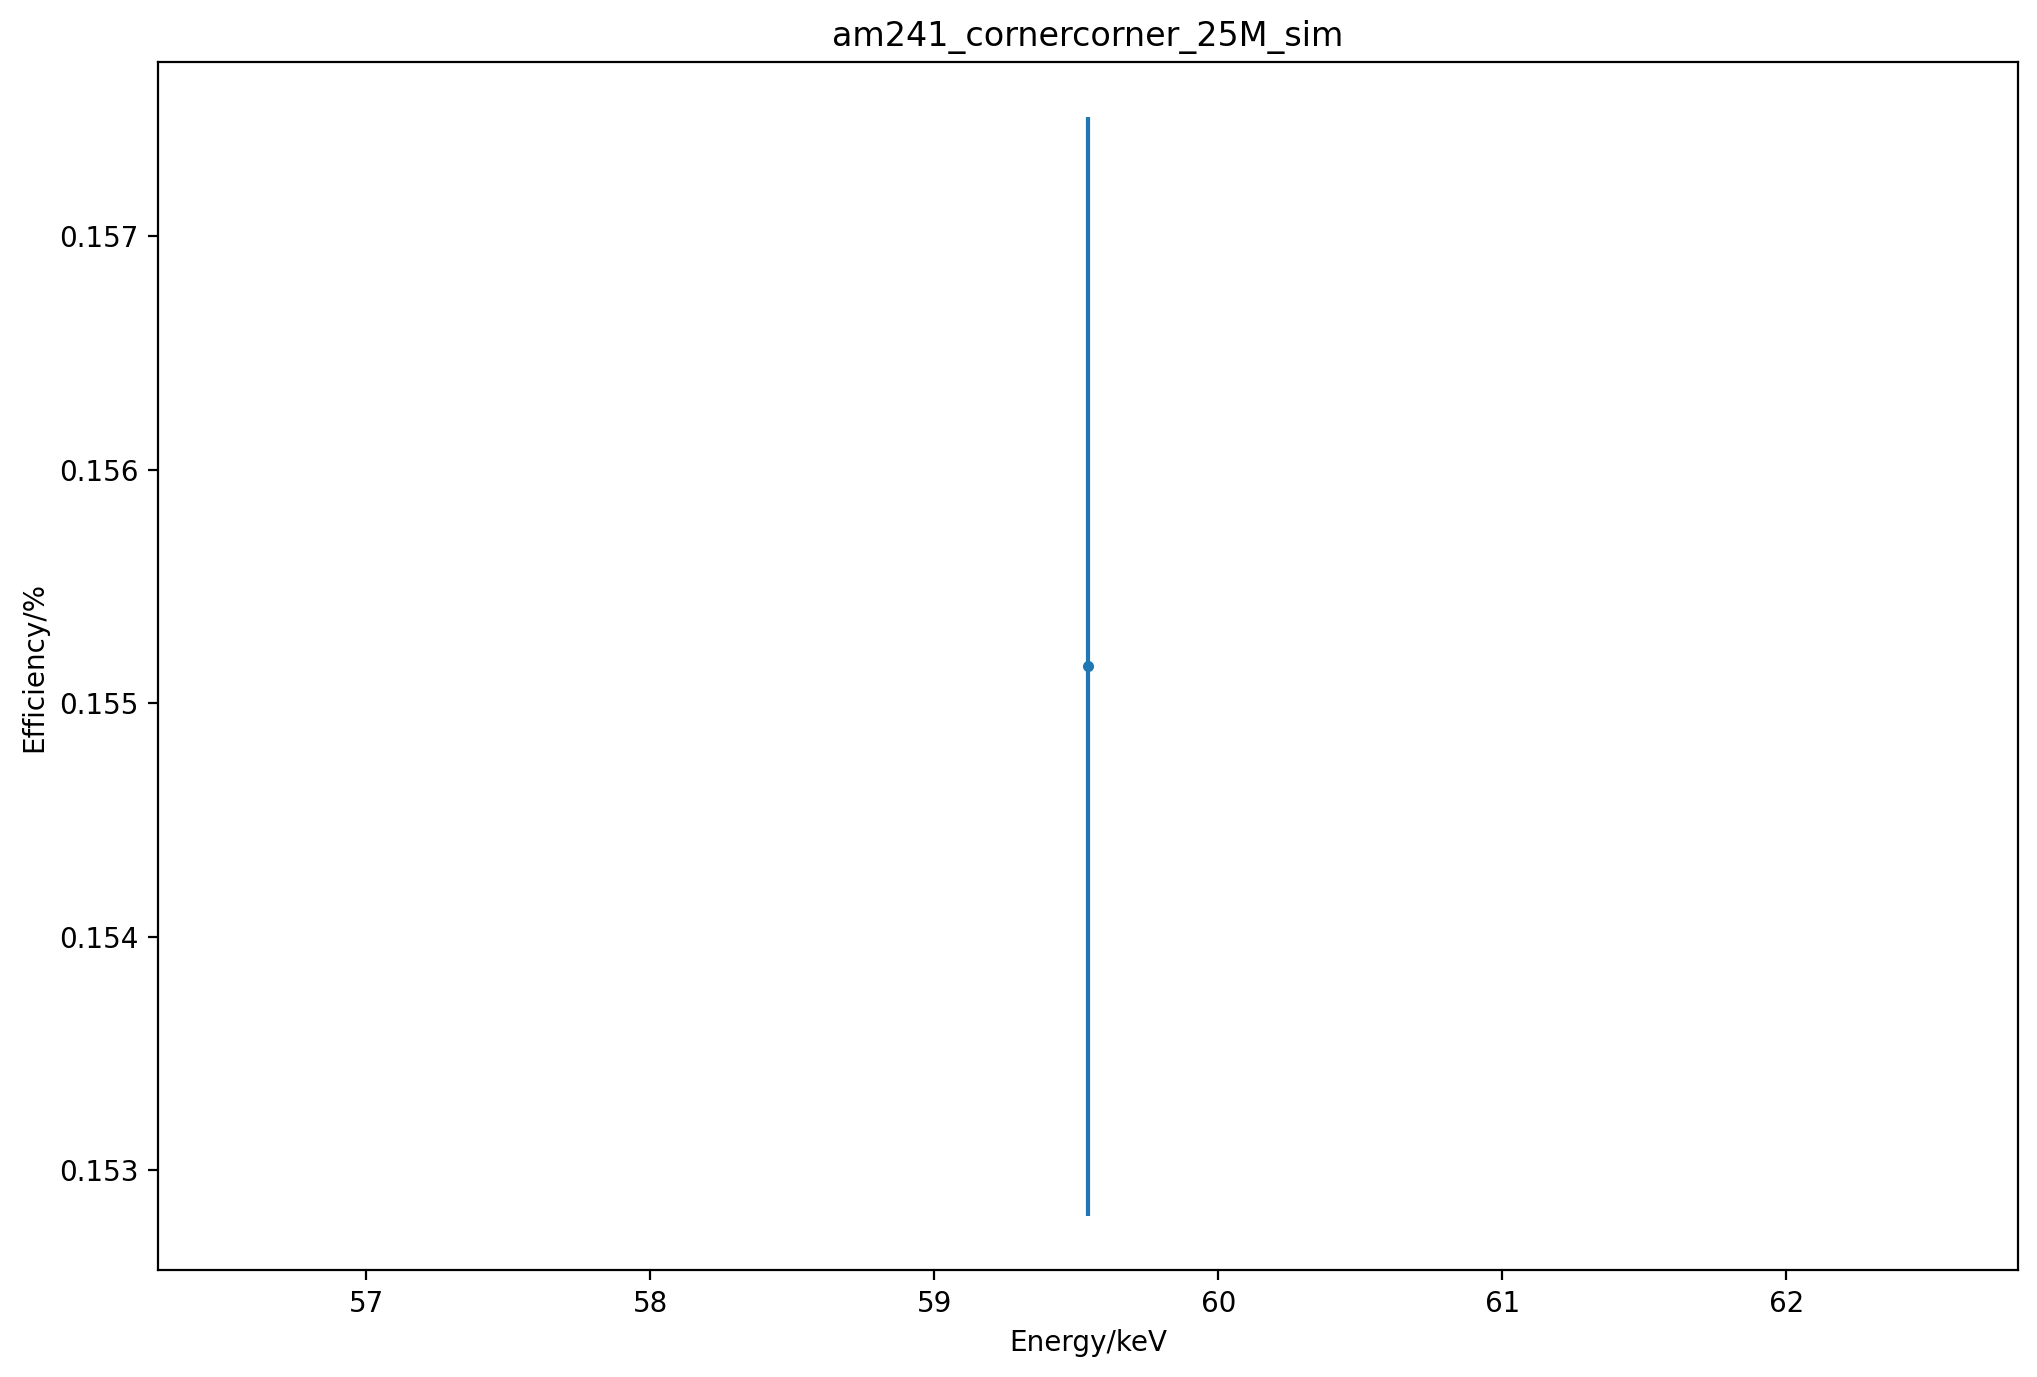


Working on simulation data for am241 ...

    parent                  : am241
    combined_simulation_file: /home/thakur/geivanalysis/my_test/data_cornercorner_25M.dat
    save_dir                : /home/thakur/geivanalysis/my_test
    
data_type: data
plot_title    : am241_cornercorner_25M_data
pdf/png_name  : /home/thakur/geivanalysis/my_test/data_am241_cornercorner_25M.pdf

/home/thakur/geivanalysis/my_test/data_cornercorner_25M.dat exists!
processing ....

Plot saved as /home/thakur/geivanalysis/my_test/data_am241_cornercorner_25M.pdf/.png



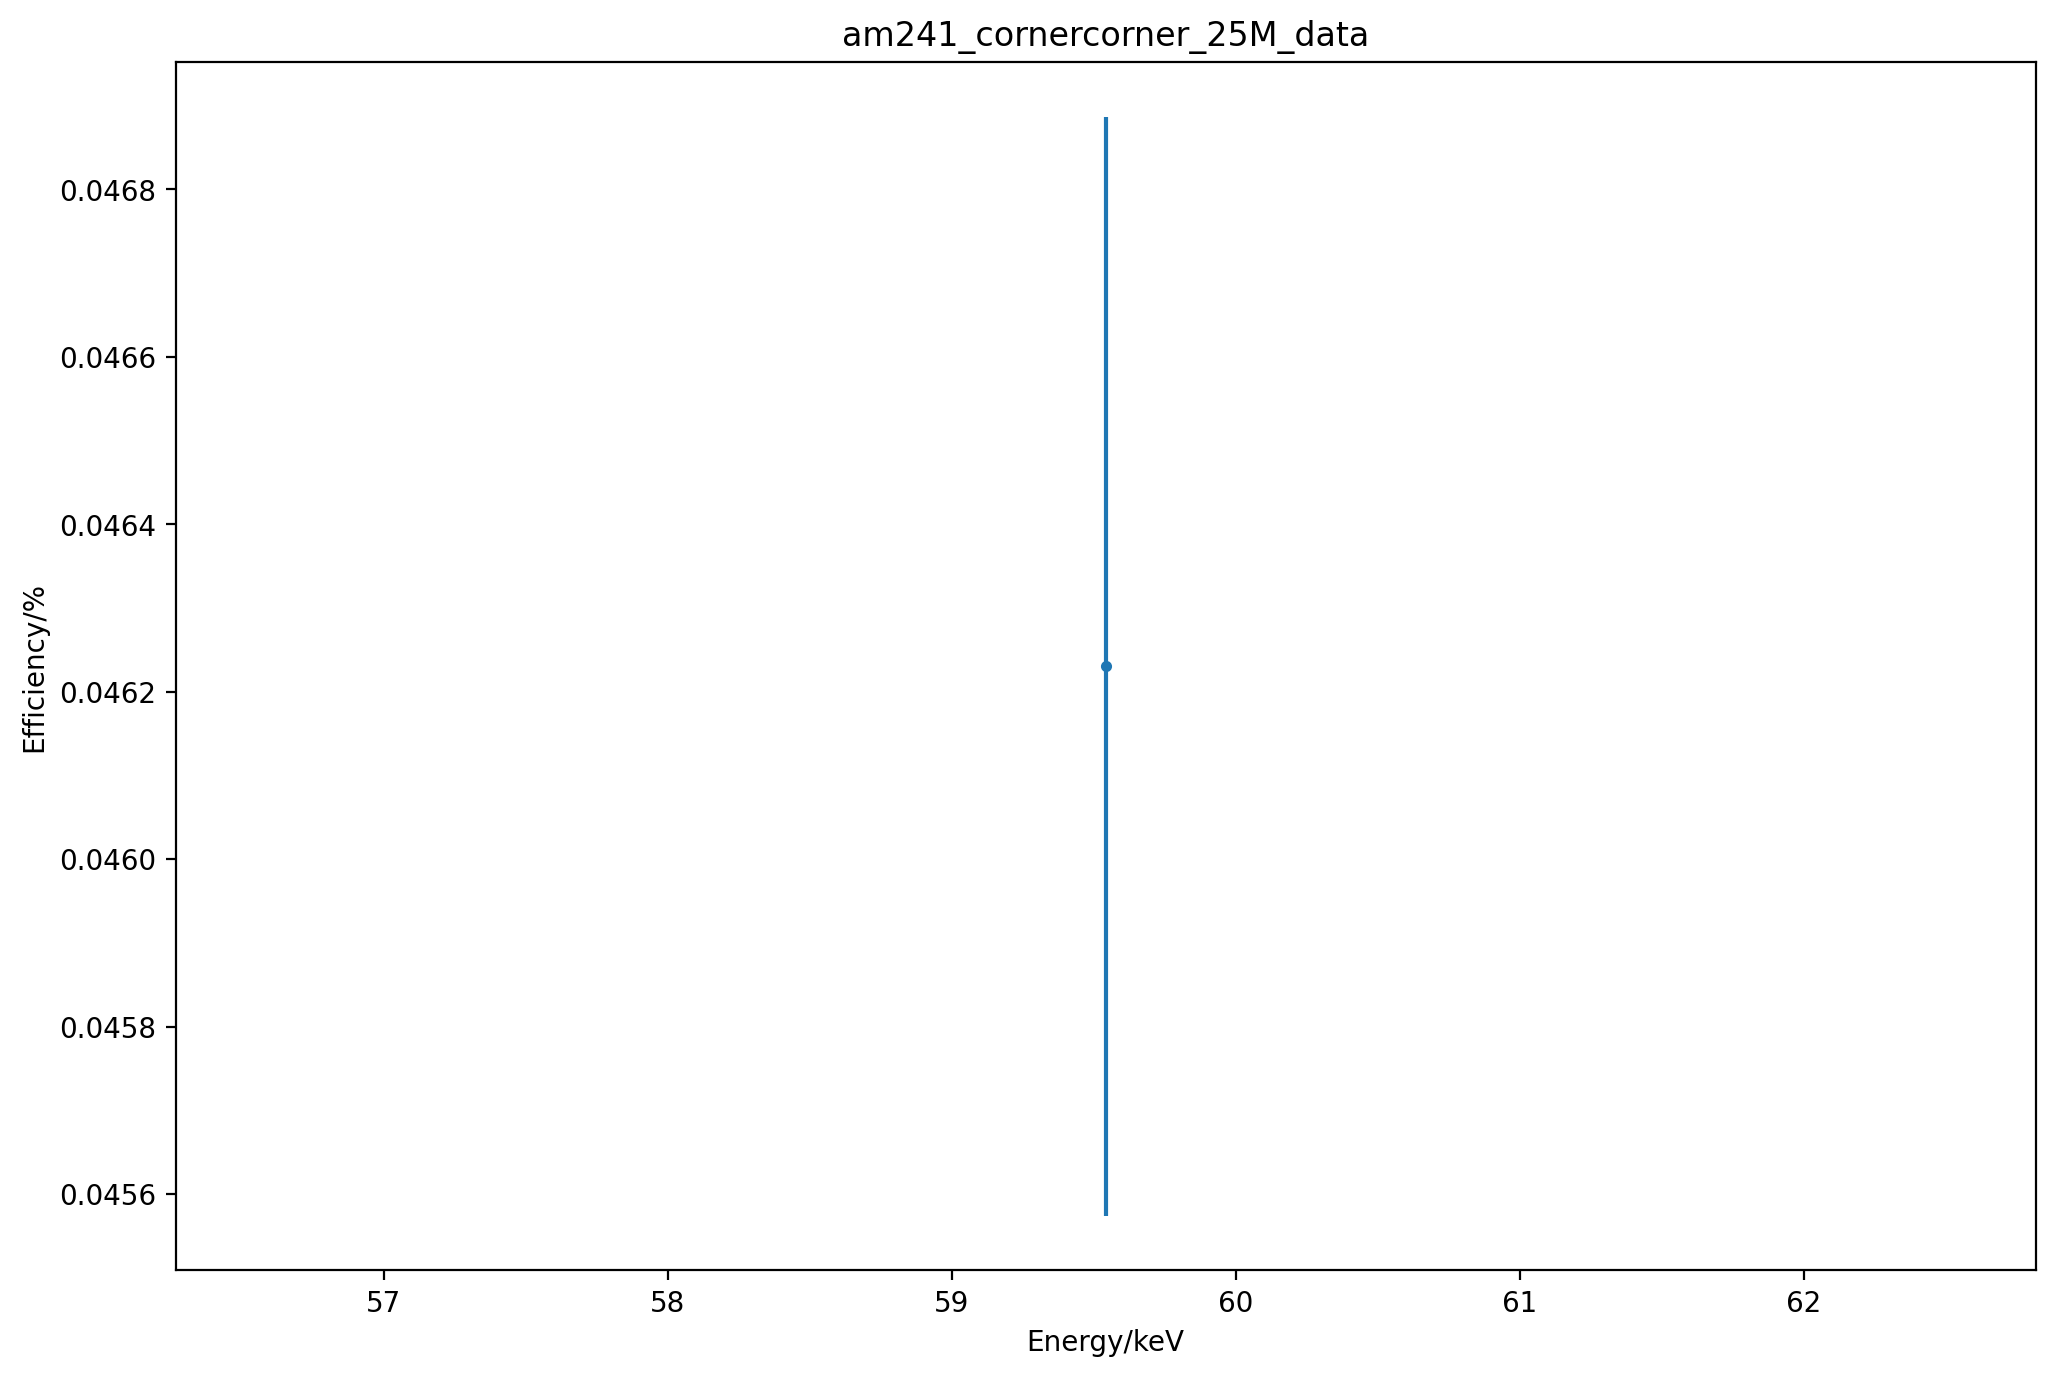


Working on simulation data for pb210 ...

    parent                  : pb210
    combined_simulation_file: /home/thakur/geivanalysis/my_test/sim_cornercorner_25M.dat
    save_dir                : /home/thakur/geivanalysis/my_test
    
data_type: sim
plot_title    : pb210_cornercorner_25M_sim
pdf/png_name  : /home/thakur/geivanalysis/my_test/sim_pb210_cornercorner_25M.pdf

/home/thakur/geivanalysis/my_test/sim_cornercorner_25M.dat exists!
processing ....

Plot saved as /home/thakur/geivanalysis/my_test/sim_pb210_cornercorner_25M.pdf/.png



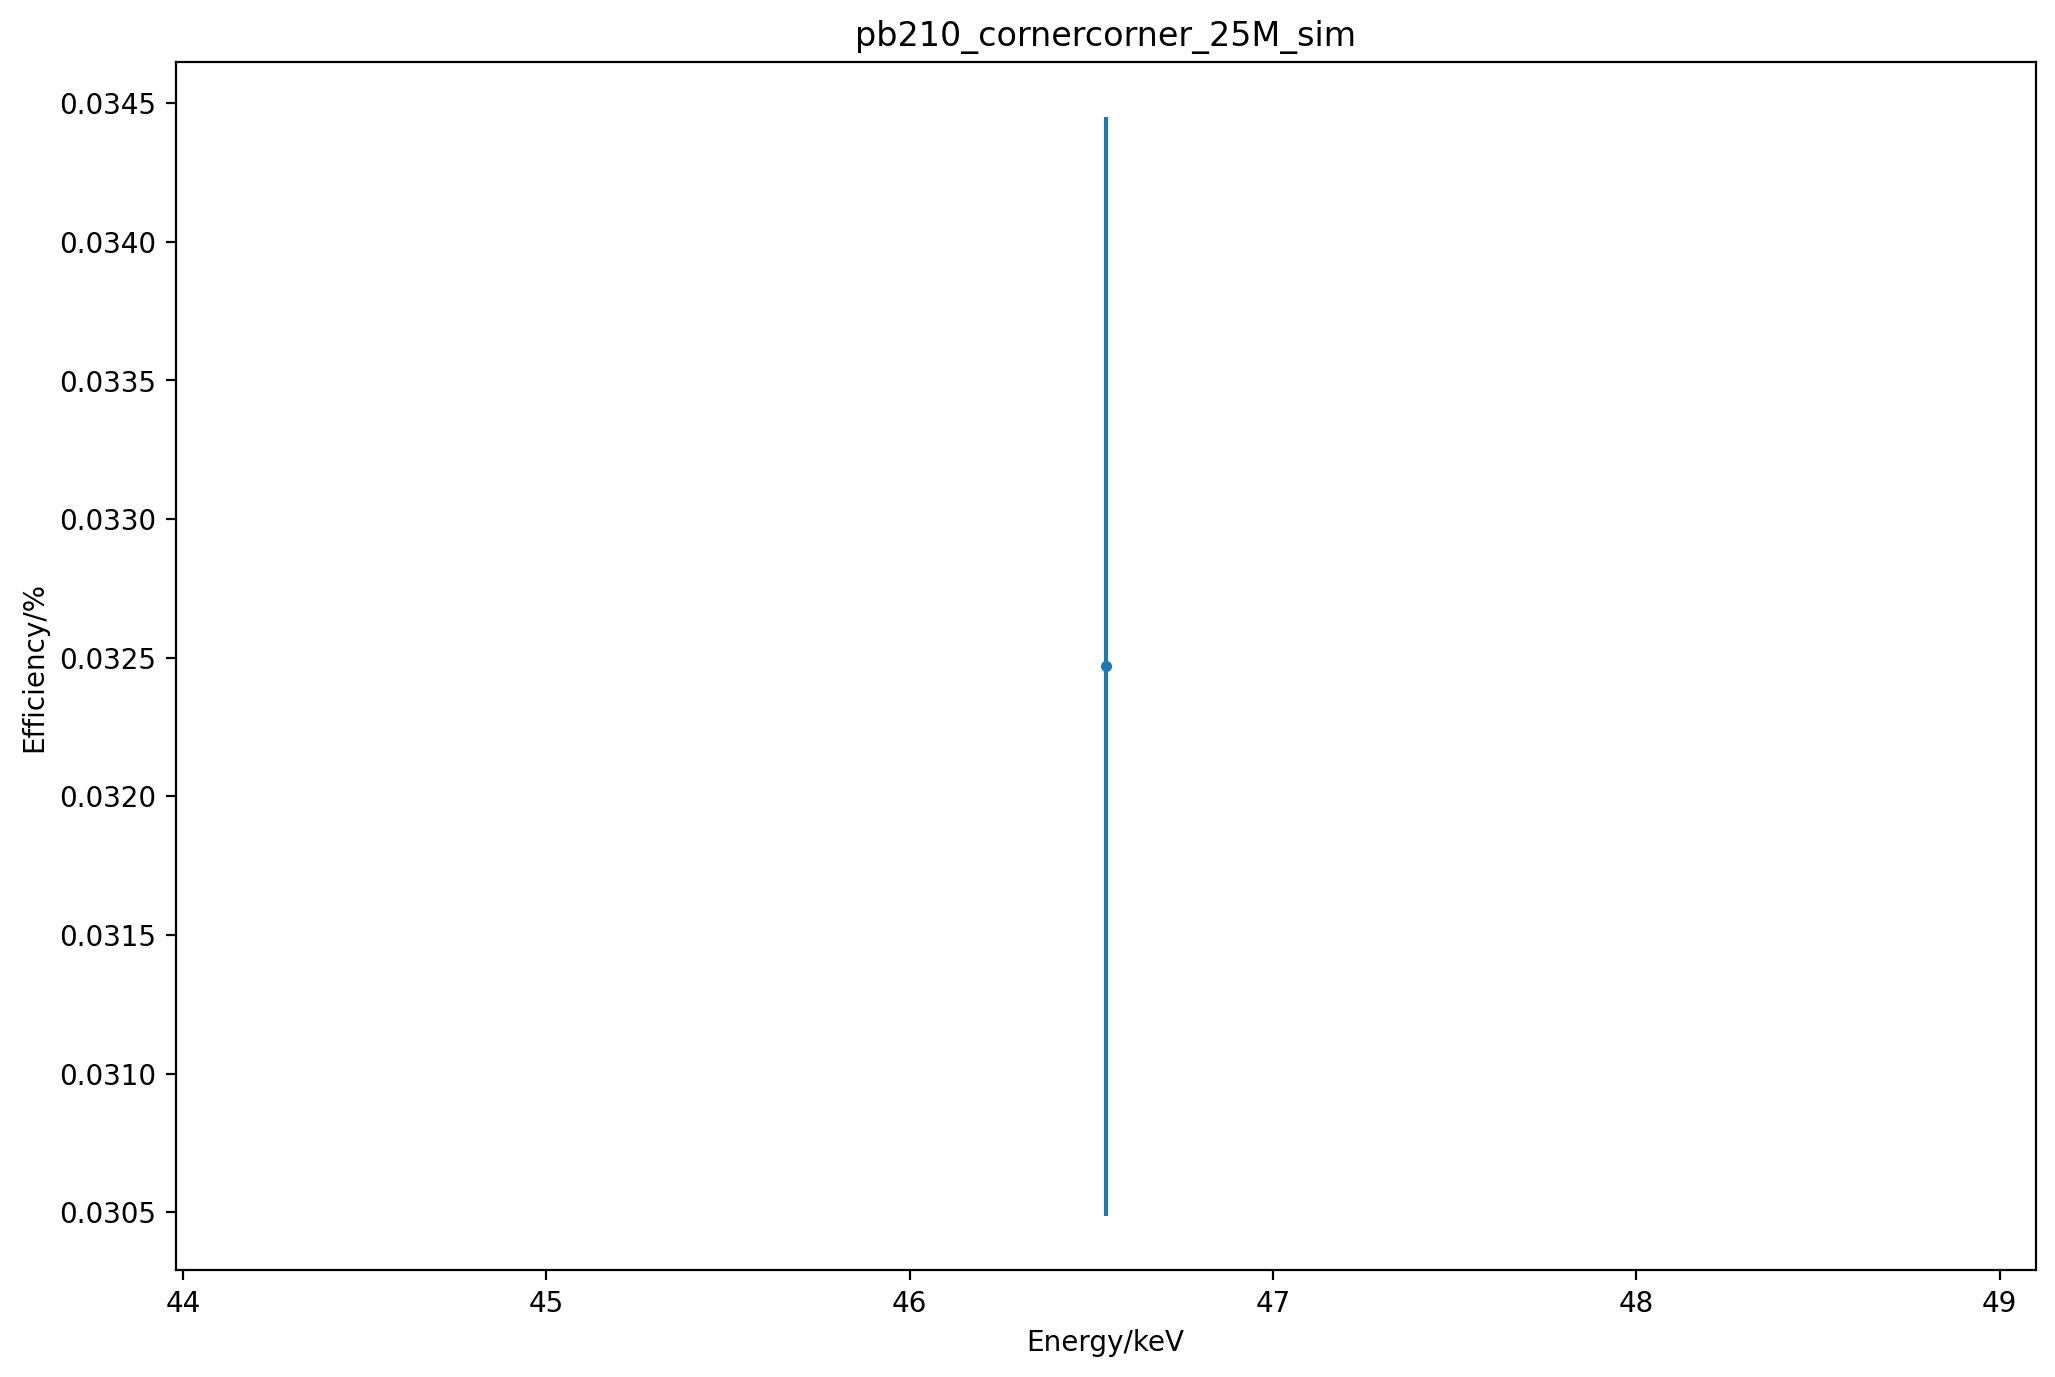


Working on simulation data for pb210 ...

    parent                  : pb210
    combined_simulation_file: /home/thakur/geivanalysis/my_test/data_cornercorner_25M.dat
    save_dir                : /home/thakur/geivanalysis/my_test
    
data_type: data
plot_title    : pb210_cornercorner_25M_data
pdf/png_name  : /home/thakur/geivanalysis/my_test/data_pb210_cornercorner_25M.pdf

/home/thakur/geivanalysis/my_test/data_cornercorner_25M.dat exists!
processing ....

Plot saved as /home/thakur/geivanalysis/my_test/data_pb210_cornercorner_25M.pdf/.png



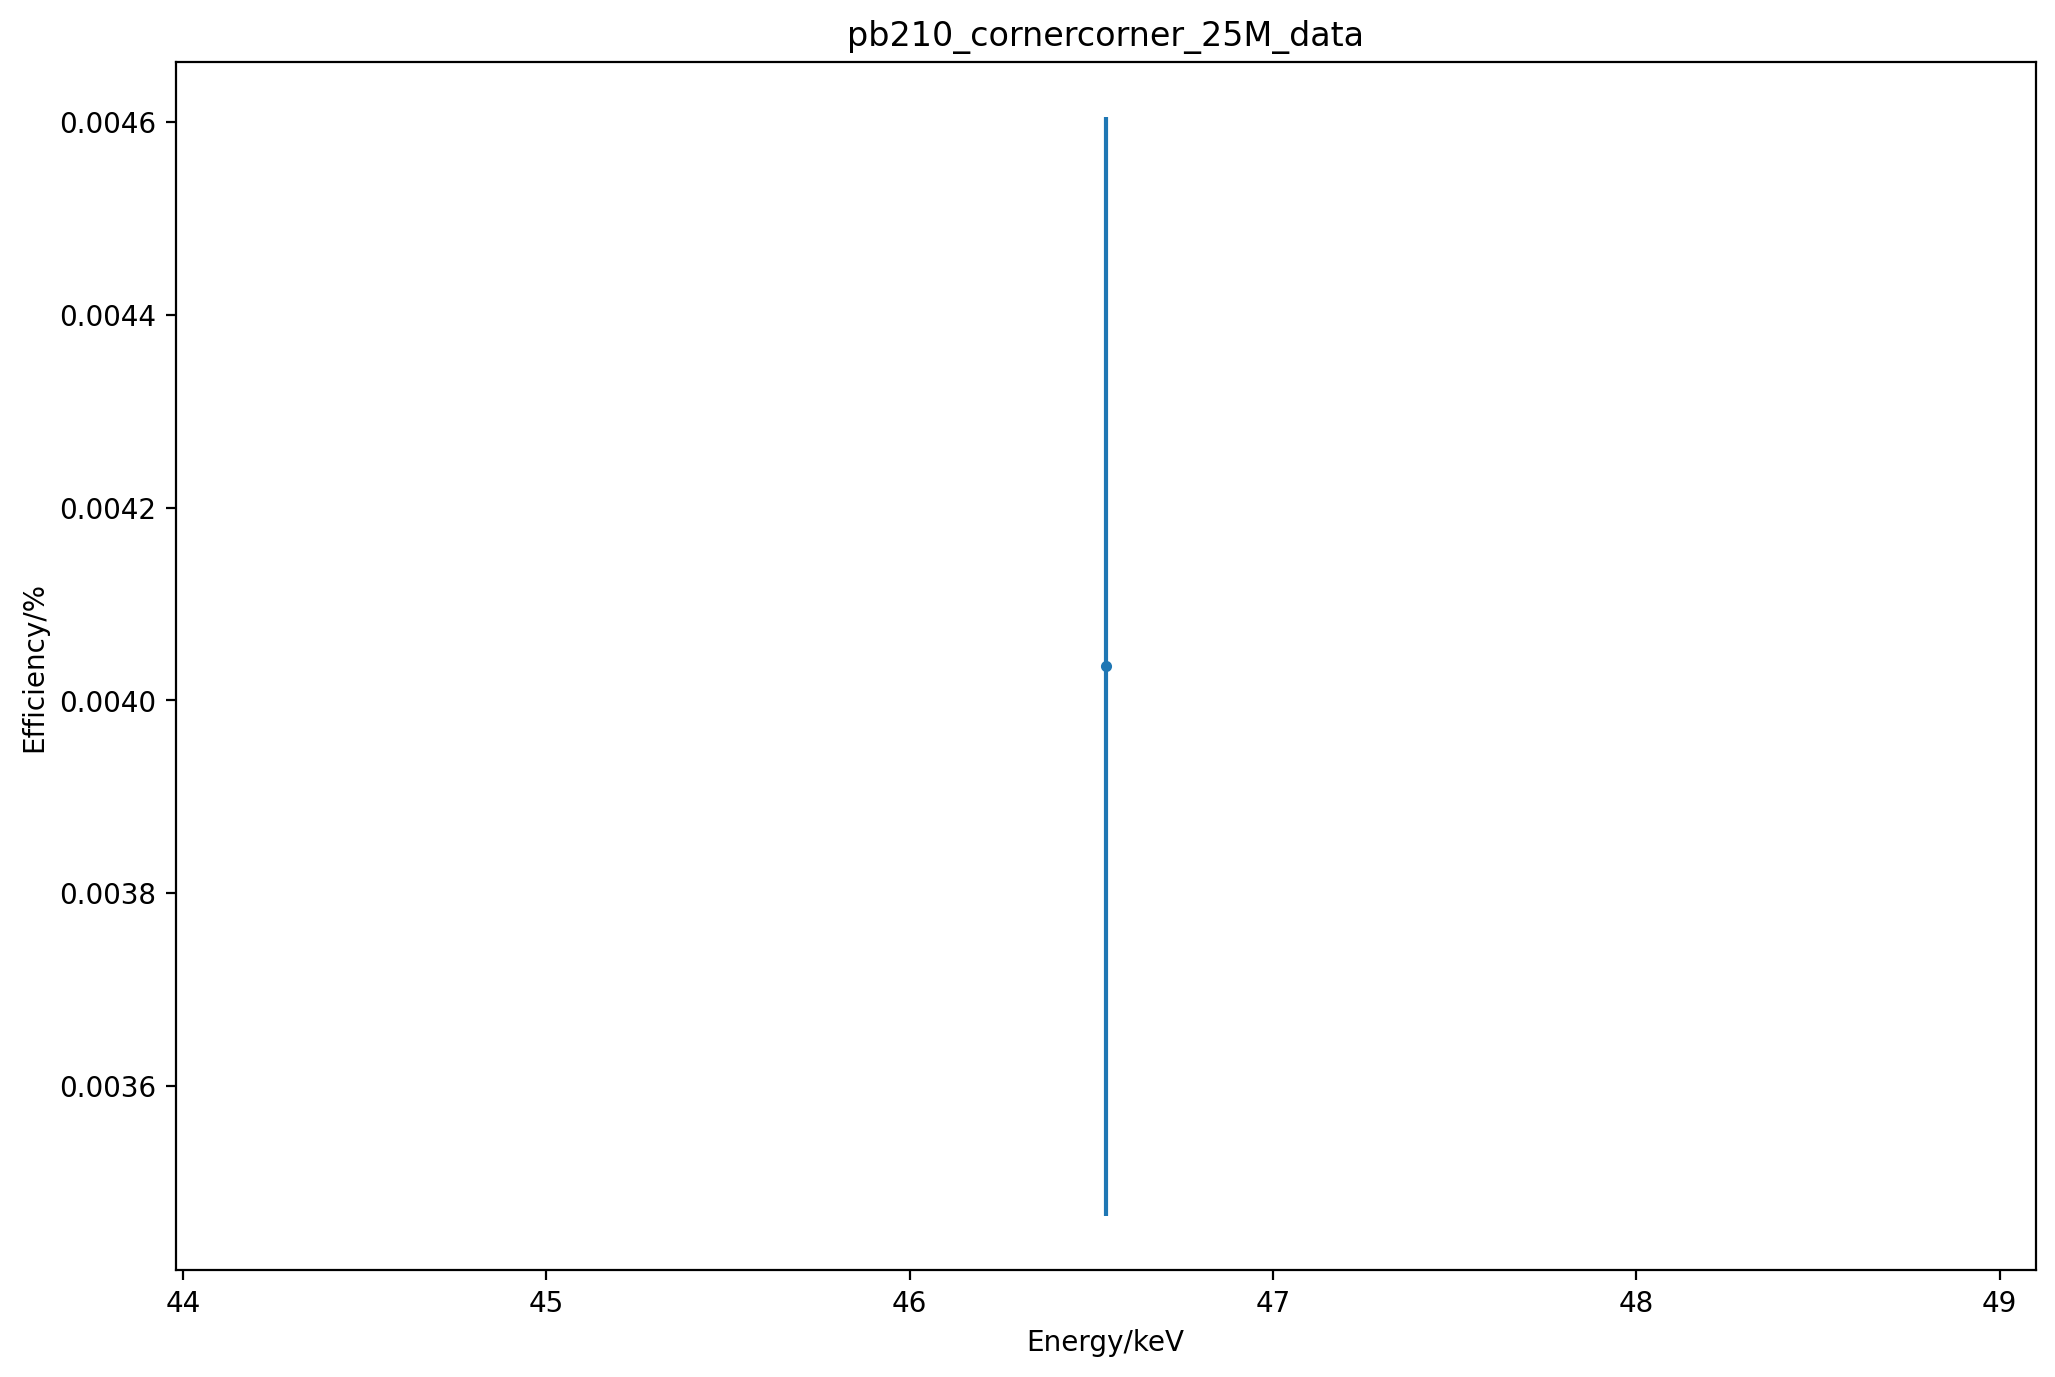


Working on simulation data for ra226 ...

    parent                  : ra226
    combined_simulation_file: /home/thakur/geivanalysis/my_test/sim_cornercorner_25M.dat
    save_dir                : /home/thakur/geivanalysis/my_test
    
data_type: sim
plot_title    : ra226_cornercorner_25M_sim
pdf/png_name  : /home/thakur/geivanalysis/my_test/sim_ra226_cornercorner_25M.pdf

/home/thakur/geivanalysis/my_test/sim_cornercorner_25M.dat exists!
processing ....

Plot saved as /home/thakur/geivanalysis/my_test/sim_ra226_cornercorner_25M.pdf/.png



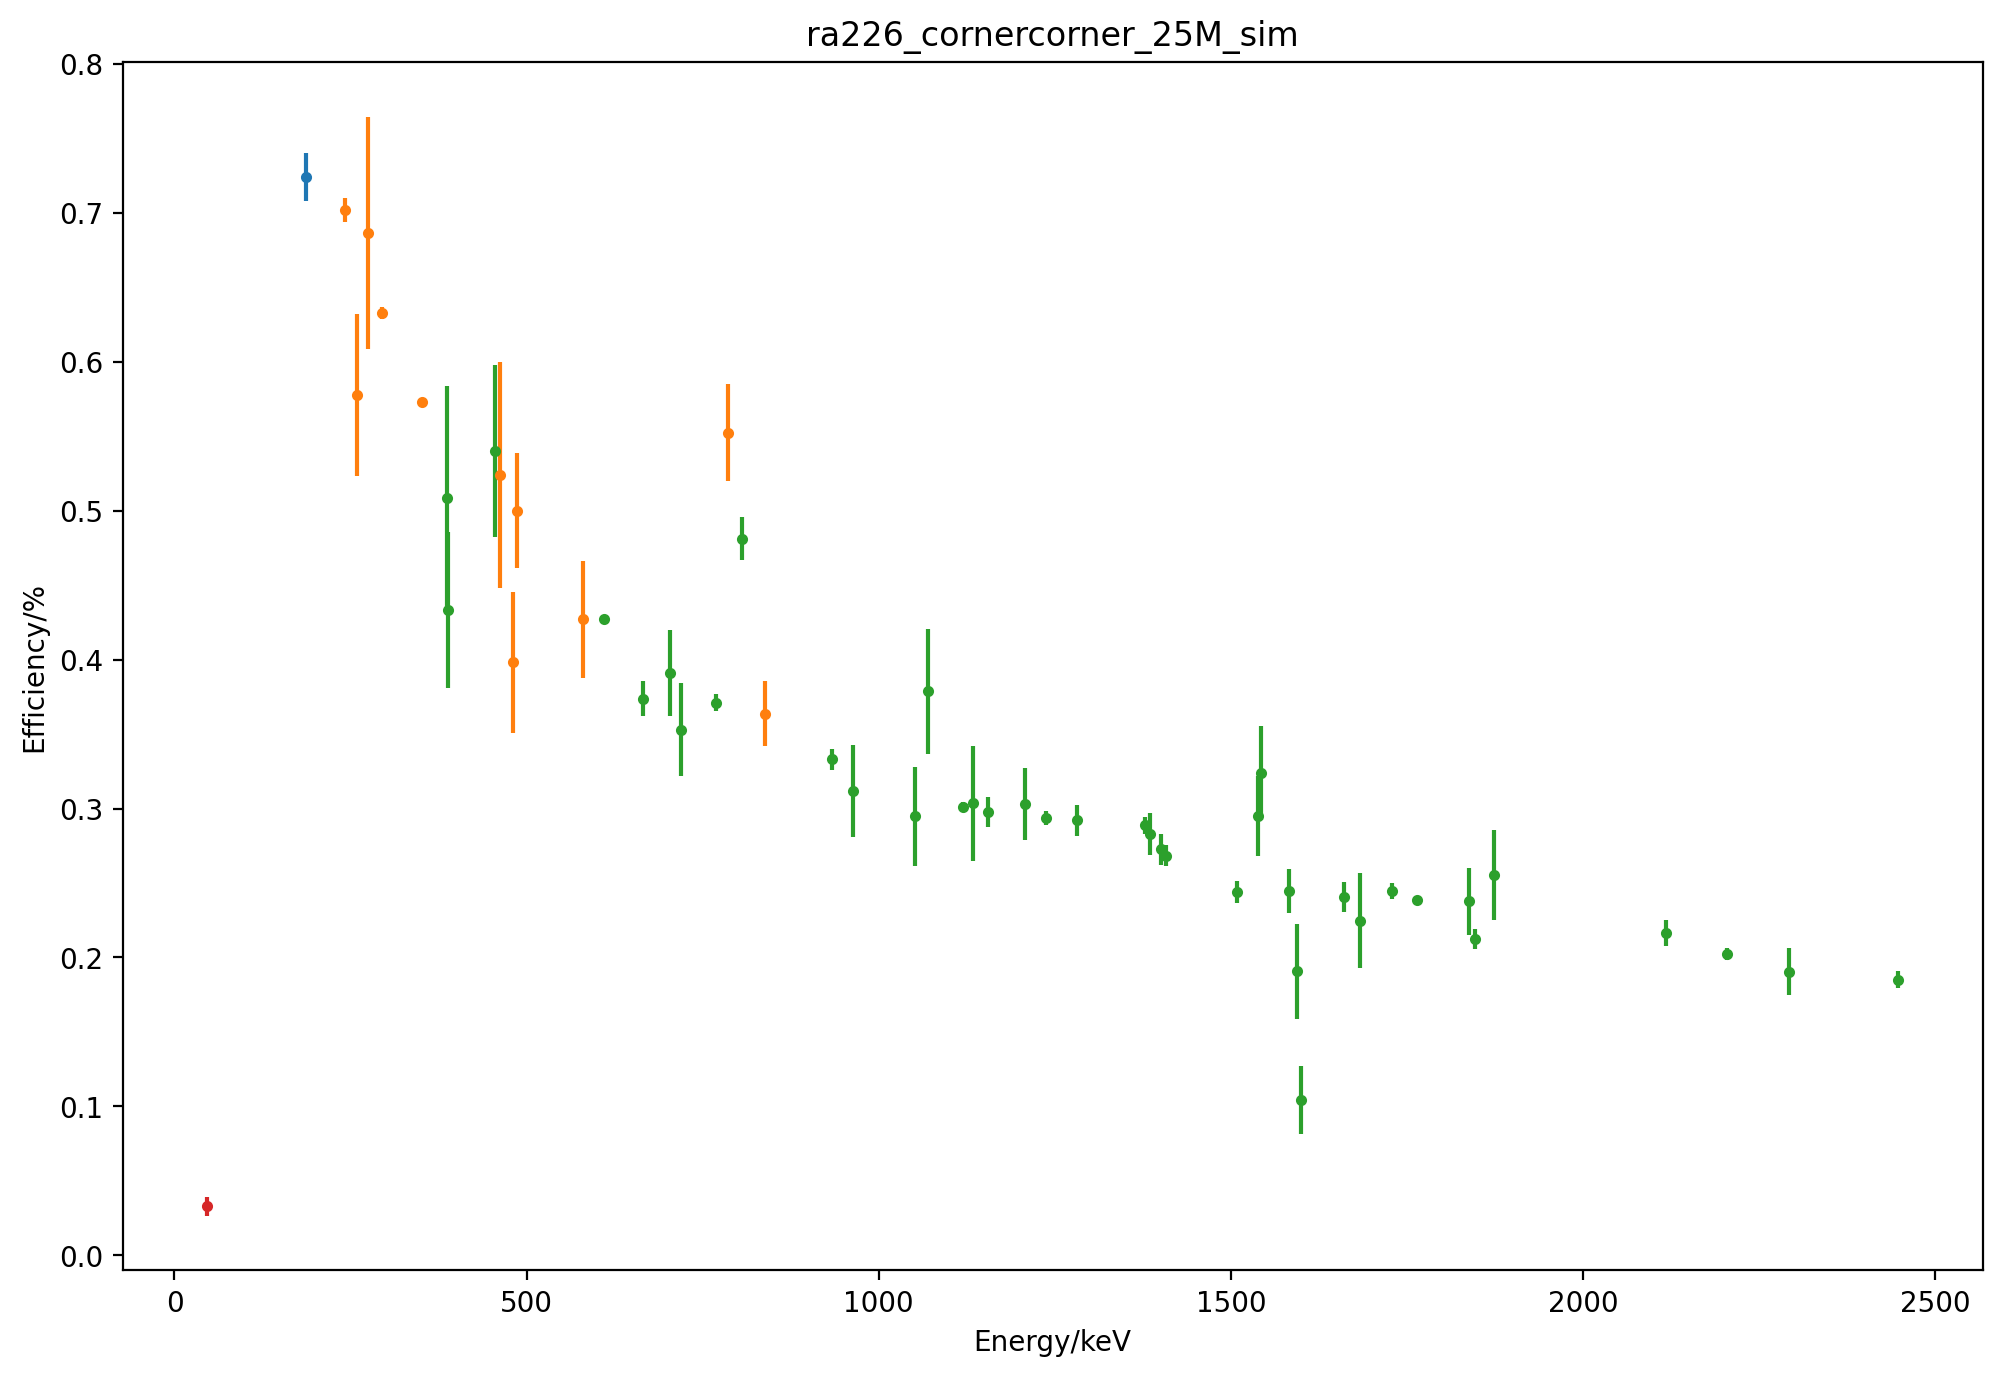


Working on simulation data for ra226 ...

    parent                  : ra226
    combined_simulation_file: /home/thakur/geivanalysis/my_test/data_cornercorner_25M.dat
    save_dir                : /home/thakur/geivanalysis/my_test
    
data_type: data
plot_title    : ra226_cornercorner_25M_data
pdf/png_name  : /home/thakur/geivanalysis/my_test/data_ra226_cornercorner_25M.pdf

/home/thakur/geivanalysis/my_test/data_cornercorner_25M.dat exists!
processing ....

Plot saved as /home/thakur/geivanalysis/my_test/data_ra226_cornercorner_25M.pdf/.png



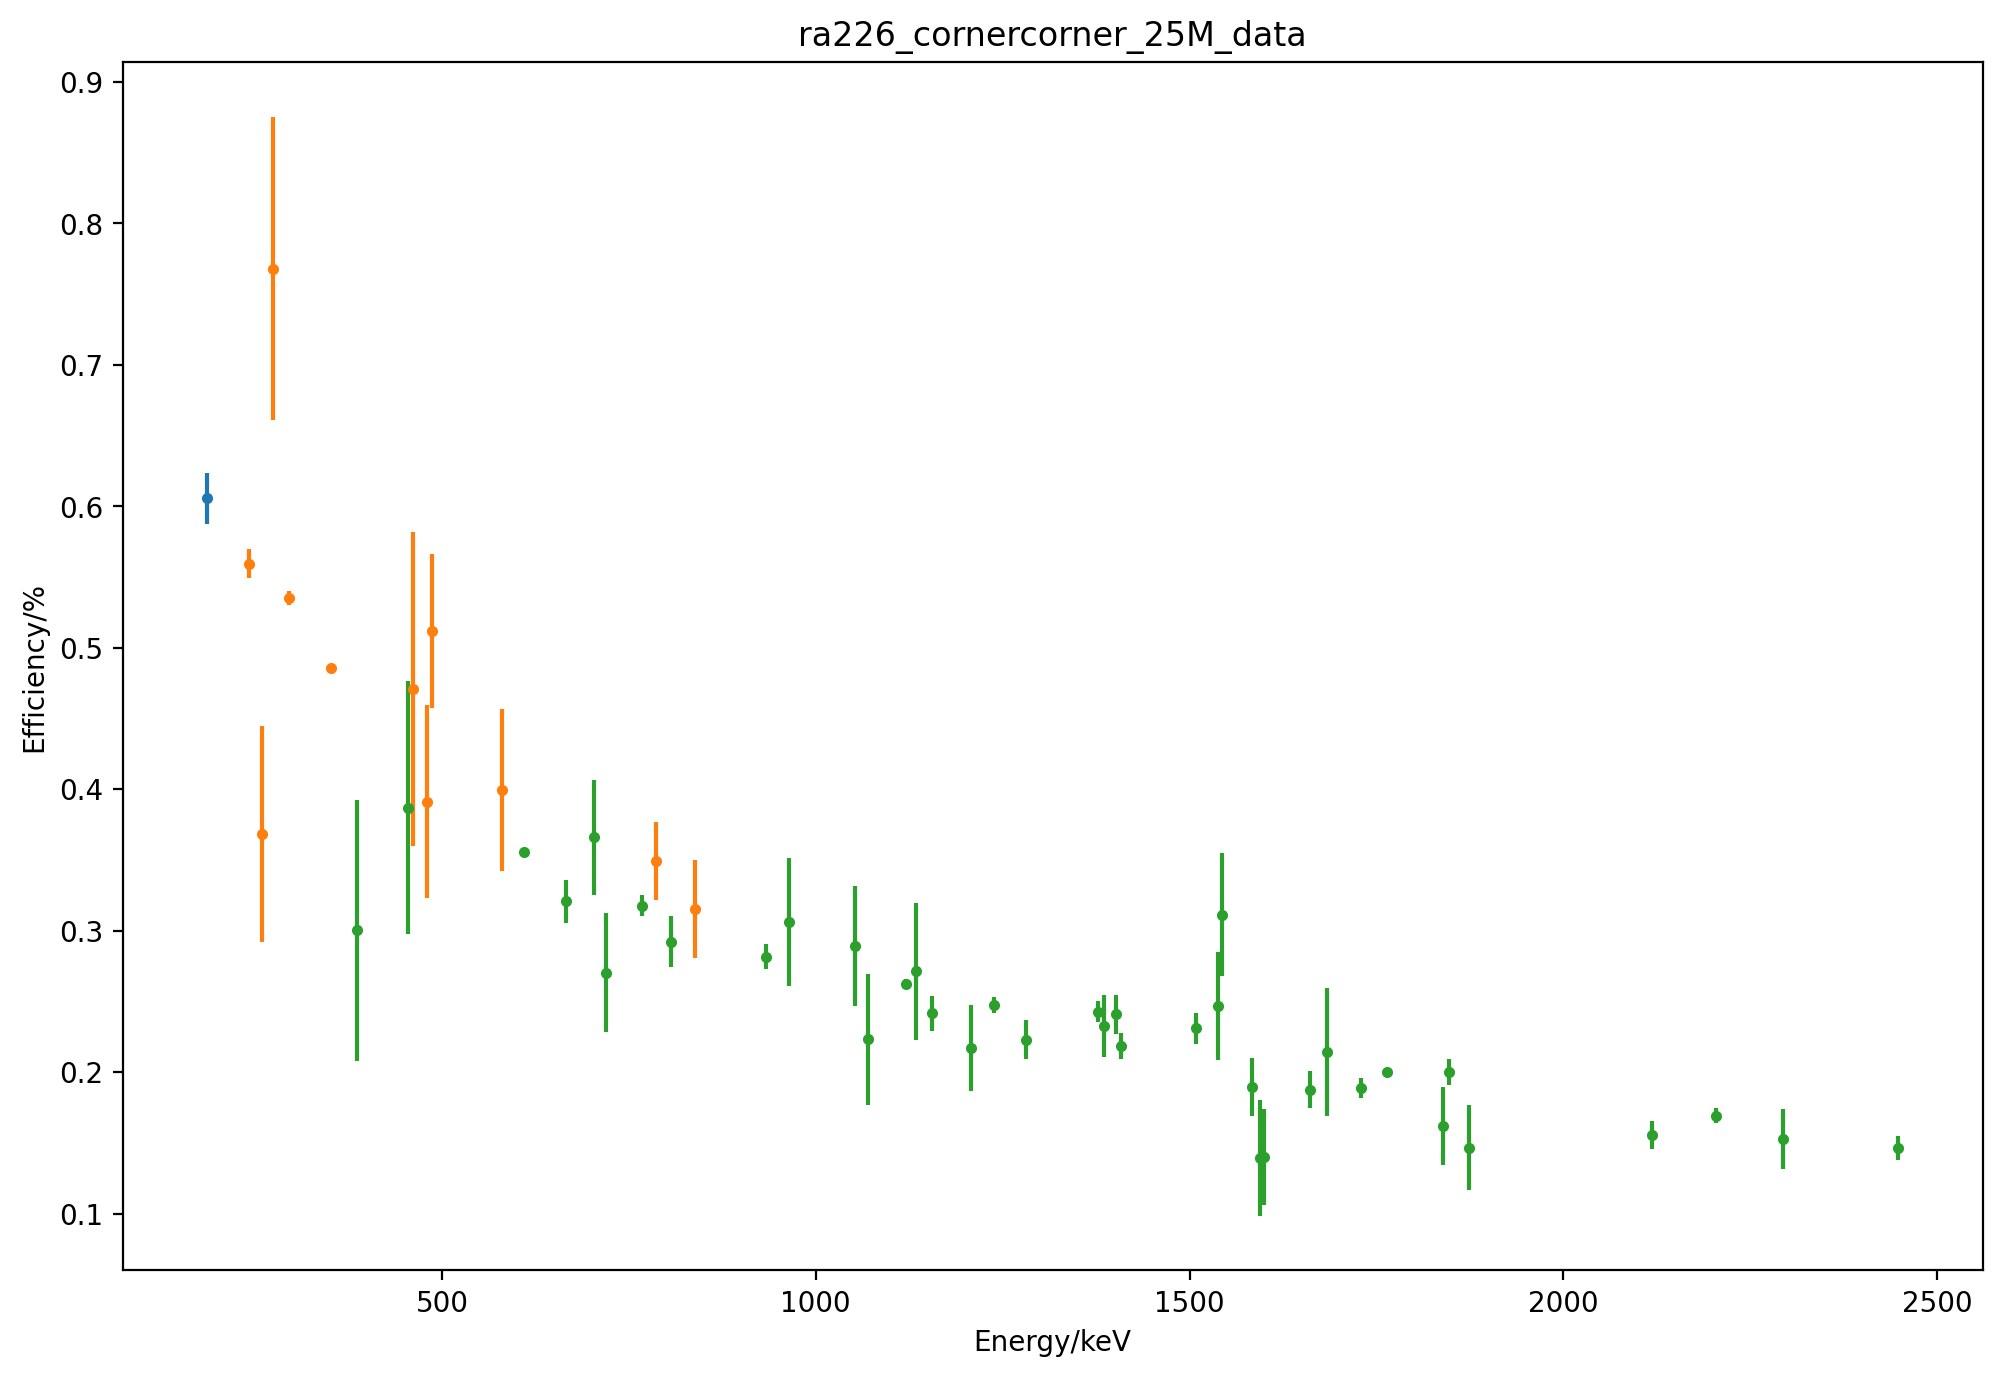

In [25]:
for iso in isotopes:
    #if iso!='am241':continue
    get_data_sim_plot(iso,combined_sim_file)
    get_data_sim_plot(iso,combined_data_file)

In [26]:
#dest_path,data_suffix
correction_data_path=f'{dest_path}/correction{data_suffix}.dat'


In [27]:

def get_correction_plot(parent,correction_data_path=correction_data_path):
    """
    returns a correction plot based on the correction data for isotope/parent
    also returns source_correction.dat file
    """


    ethresh = 60 # keV
    
    print(f"""
parent               :{parent}
correction_data_path :{correction_data_path}
    """)
    
    suff=correction_data_path.split('/')[-1].split('.')[0]
 
    pdf_save_name=f'{dest_path}/{parent}_{suff}.pdf' #need to delete this if it is present as it is appended
    
    print(f'plot_save_name: {pdf_save_name}/.png')
    
    f=correction_data_path

    #check if correction data file exist
    if os.path.isfile(f):
        print(f'file: {f} exists')
        print('processing ....\n')
        time.sleep(5)
    else:
        print(f'file: {f} doesnot exist')
        print('quiting ....\n')
        sys.exit(1)
        time.sleep(5)

    plot_title=f"{parent}_{suff}"
    
    
    data = []
    file = open(f, 'r')
    for line in file:
        words = line.split()
        if len(sys.argv) > 1:
            if words[0] != parent:
                continue
        data.append([
            [ words[0],        # 0: parent
              words[1] ],      # 0: isotope
            float(words[2]),   # 1: energy
            float(words[3]),   # 2: efficiency correction
            float(words[4]),   # 3: total error for a single gamma-ray (minus)
            float(words[5]),   # 4: total error for a single gamma-ray (plus)
            float(words[6]),   # 5: uncorrelated error (minus)
            float(words[7]),   # 6: uncorrelated error (plus)
            float(words[8]),   # 7: fractional correlated error (minus)
            float(words[9]) ]) # 8: fractional correlated error (plus)
    for entry in reversed(range(len(data))):
        for e in range(entry):
            # If this entry's isotope and energy match a later one, then remove it.
            if data[e][0] == data[entry][0] and data[e][1] == data[entry][1]:
                data.remove(data[e])
                break

    for entry in range(len(data)):
        data[entry] = [0] + data[entry][1:] # remove non-floats (isotope names)
    data = numpy.array(data)

    pyplot.errorbar(data[:,1], data[:,2], yerr=[data[:,5], data[:,6]], fmt='.' )
    pyplot.xlabel('Energy/keV')
    pyplot.ylabel('Data/simulation')
    pyplot.title(plot_title)
    pyplot.autoscale(enable=True,axis='y')
    #pyplot.xlim(0, 2500)
    #pyplot.ylim(0.00,2.00)

    pol0  = ROOT.TF1('pol0','[0]',0,2500)
    pol0.SetParameter(0,1)
    pol1  = ROOT.TF1('pol1','[0]+[1]*x',0,2500)
    pol1.SetParameters(1,0)


    #mightneed to remove it if alreay presents
    file = open(geiv_source_corr_file, 'a')
    if sum(ene > ethresh for ene in data[:,1]) > 1:
        # Fit and plot correction as a function of energy for all calibrations.
        print("Fit data for :"+parent)
        print()
        time.sleep(3)
        #ROOT.gStyle.SetOptFit(1111) #didnot work
        graph = ROOT.TGraphAsymmErrors( len(data[:,1]),
                                        array.array('d', data[:,1]),
                                        array.array('d', data[:,2]),
                                        0,
                                        0,
                                        array.array('d', data[:,5]),
                                        array.array('d', data[:,6]) )
        result = graph.Fit('pol0','remqs','',60,2500)
        result.Print()

        #get the chisquare and mean
        mean=round(result.Parameter(0),3)      #p0
        meanerr=round(result.ParError(0),3)    #p0 error
        #meanlowerr=round(result.LowerError(0)    #error
        #meanhigherr=result.LowerError(0)    #error
        chi2=round(result.Chi2(),3)            #chisquare
        #print the values
        print("p0: {} p0 error: {}\n".format(mean,meanerr))
        print("chi^2: {} \n".format(chi2))

        #putting p0 and x^2 in the pyplot
        pyplot.text(2000,1.25,r"p0: "+str(mean)+" $\pm$ "+str(meanerr),color='red')
        pyplot.text(2000,1.15,r"$\chi^{2}$: "+str(chi2),color='red')


        file.write('{:6s} {:e} {:e} {:e} {:e} {:e}\n'.format( parent,
                                                              result.Parameters()[0],
                                                              -result.LowerError(0),
                                                              result.UpperError(0),
                                                              data[0][7], data[0][8] ))
        xs = numpy.linspace(0, 2500, num=2501)
        ys = []
        for x in xs:
            ys.append( pol0.Eval(x) )
        #get the information about xs and ys
        #for i in range(len(xs)):
        #    print("xs: {}  ys: {}".format(xs[i],ys[i]))
        pyplot.plot(xs, ys)
        pyplot.xticks(numpy.arange(min(xs),max(xs)+100,100))
        pyplot.xticks(rotation=70)
        pyplot.grid(axis='both',linestyle='--',linewidth=0.5,alpha=0.5)
        #annotate in the plot
        #fig,ax=pyplot.subplots()
        #for i,txt in enumerate(xs):
           # pyplot.annotate(str(txt),(xs[i],ys[i]))

    elif sum(ene > ethresh for ene in data[:,1]) == 1:

        file.write('{:6s} {:e} {:e} {:e} {:e} {:e}\n'.format( parent,
                                                              data[:,2][-1],
                                                              data[:,5][-1],
                                                              data[:,6][-1],
                                                              data[0][7], data[0][8] ))
    else:
        file.write('{:6s} {:e} {:e} {:e} {:e} {:e}\n'.format( parent,
                                                              -9,1,1,
                                                              data[0][7], data[0][8] ))
    file.close()

    #attempt to get 
    ax=pyplot.gca()
    line=ax.lines[0]
    lineval=line.get_xydata()
    xdata=line.get_xdata() #xdata
    ydata=line.get_ydata() #ydata

    #print("xy-val",lineval)
    #annotate

    for i,txt in enumerate(xdata):
      pyplot.annotate(str(txt),(xdata[i],ydata[i]),fontsize=5)

    #pyplot.figure(figsize=(12,8))
    #pyplot.savefig(fileloc+'correctiondoor-s-0.3-t-0.11-d-1.68'+parent+'.pdf', bbox_inches='tight')
    pyplot.savefig(pdf_save_name, bbox_inches='tight')
    pyplot.savefig(pdf_save_name.replace('.pdf','.png'), bbox_inches='tight')
    print(f'plot saved at : {pdf_save_name}/.png\n')
    pyplot.show()
    #print("Plot are at "+fileloc+'correctiondoor-s-0.3-t-0.11-d-1.68'+parent+'.pdf')

#pyplot.show()


parent               :am241
correction_data_path :/home/thakur/geivanalysis/my_test/correction_cornercorner_25M.dat
    
plot_save_name: /home/thakur/geivanalysis/my_test/am241_correction_cornercorner_25M.pdf/.png
file: /home/thakur/geivanalysis/my_test/correction_cornercorner_25M.dat exists
processing ....

plot saved at : /home/thakur/geivanalysis/my_test/am241_correction_cornercorner_25M.pdf/.png



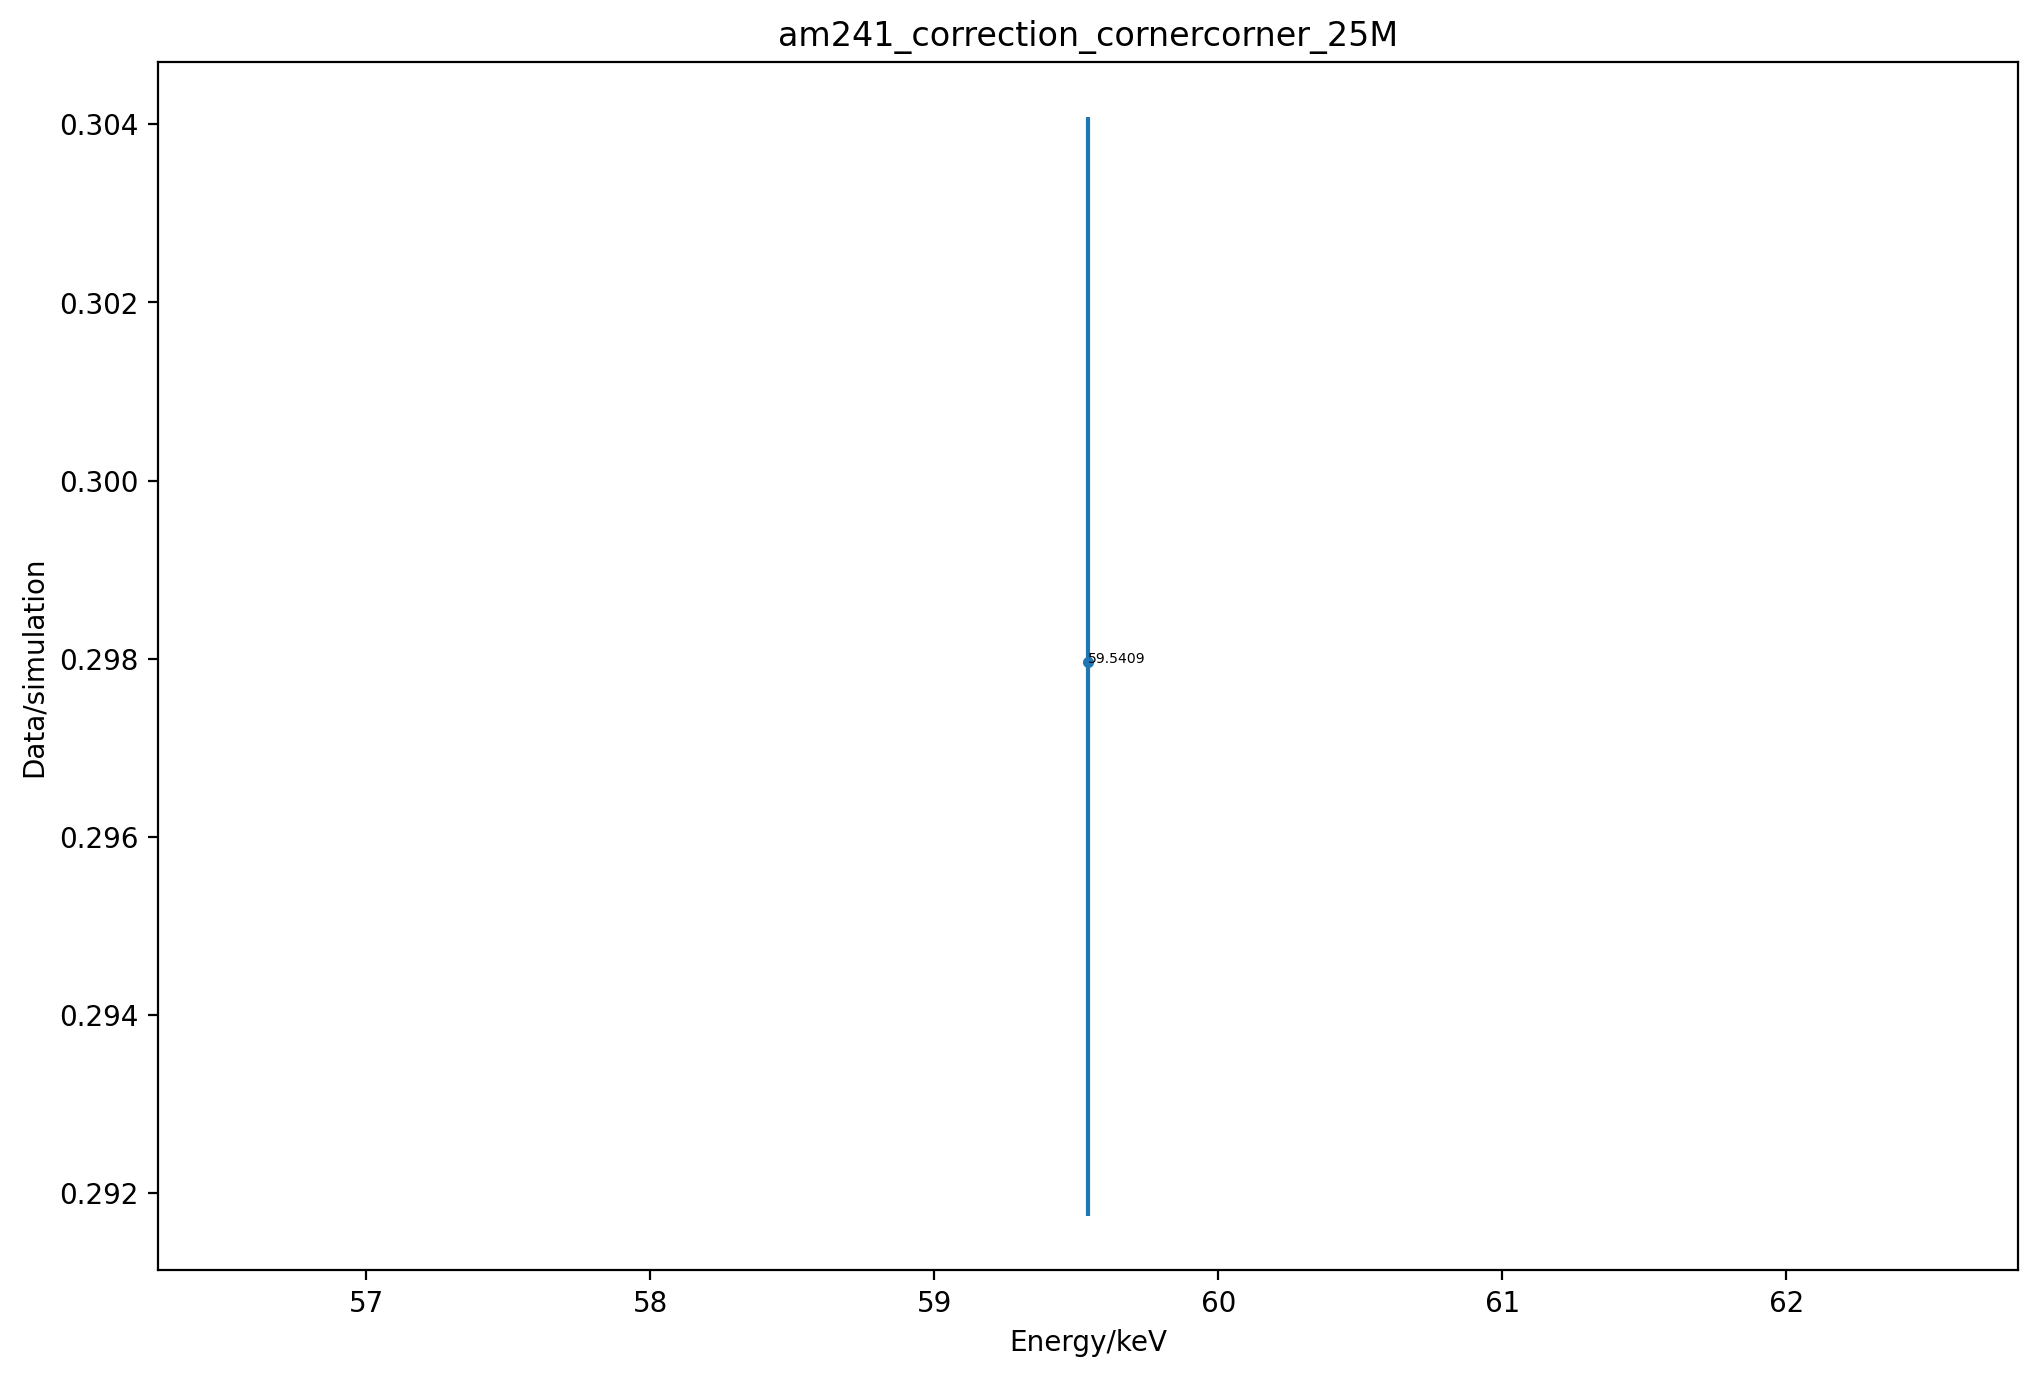


parent               :pb210
correction_data_path :/home/thakur/geivanalysis/my_test/correction_cornercorner_25M.dat
    
plot_save_name: /home/thakur/geivanalysis/my_test/pb210_correction_cornercorner_25M.pdf/.png
file: /home/thakur/geivanalysis/my_test/correction_cornercorner_25M.dat exists
processing ....

plot saved at : /home/thakur/geivanalysis/my_test/pb210_correction_cornercorner_25M.pdf/.png



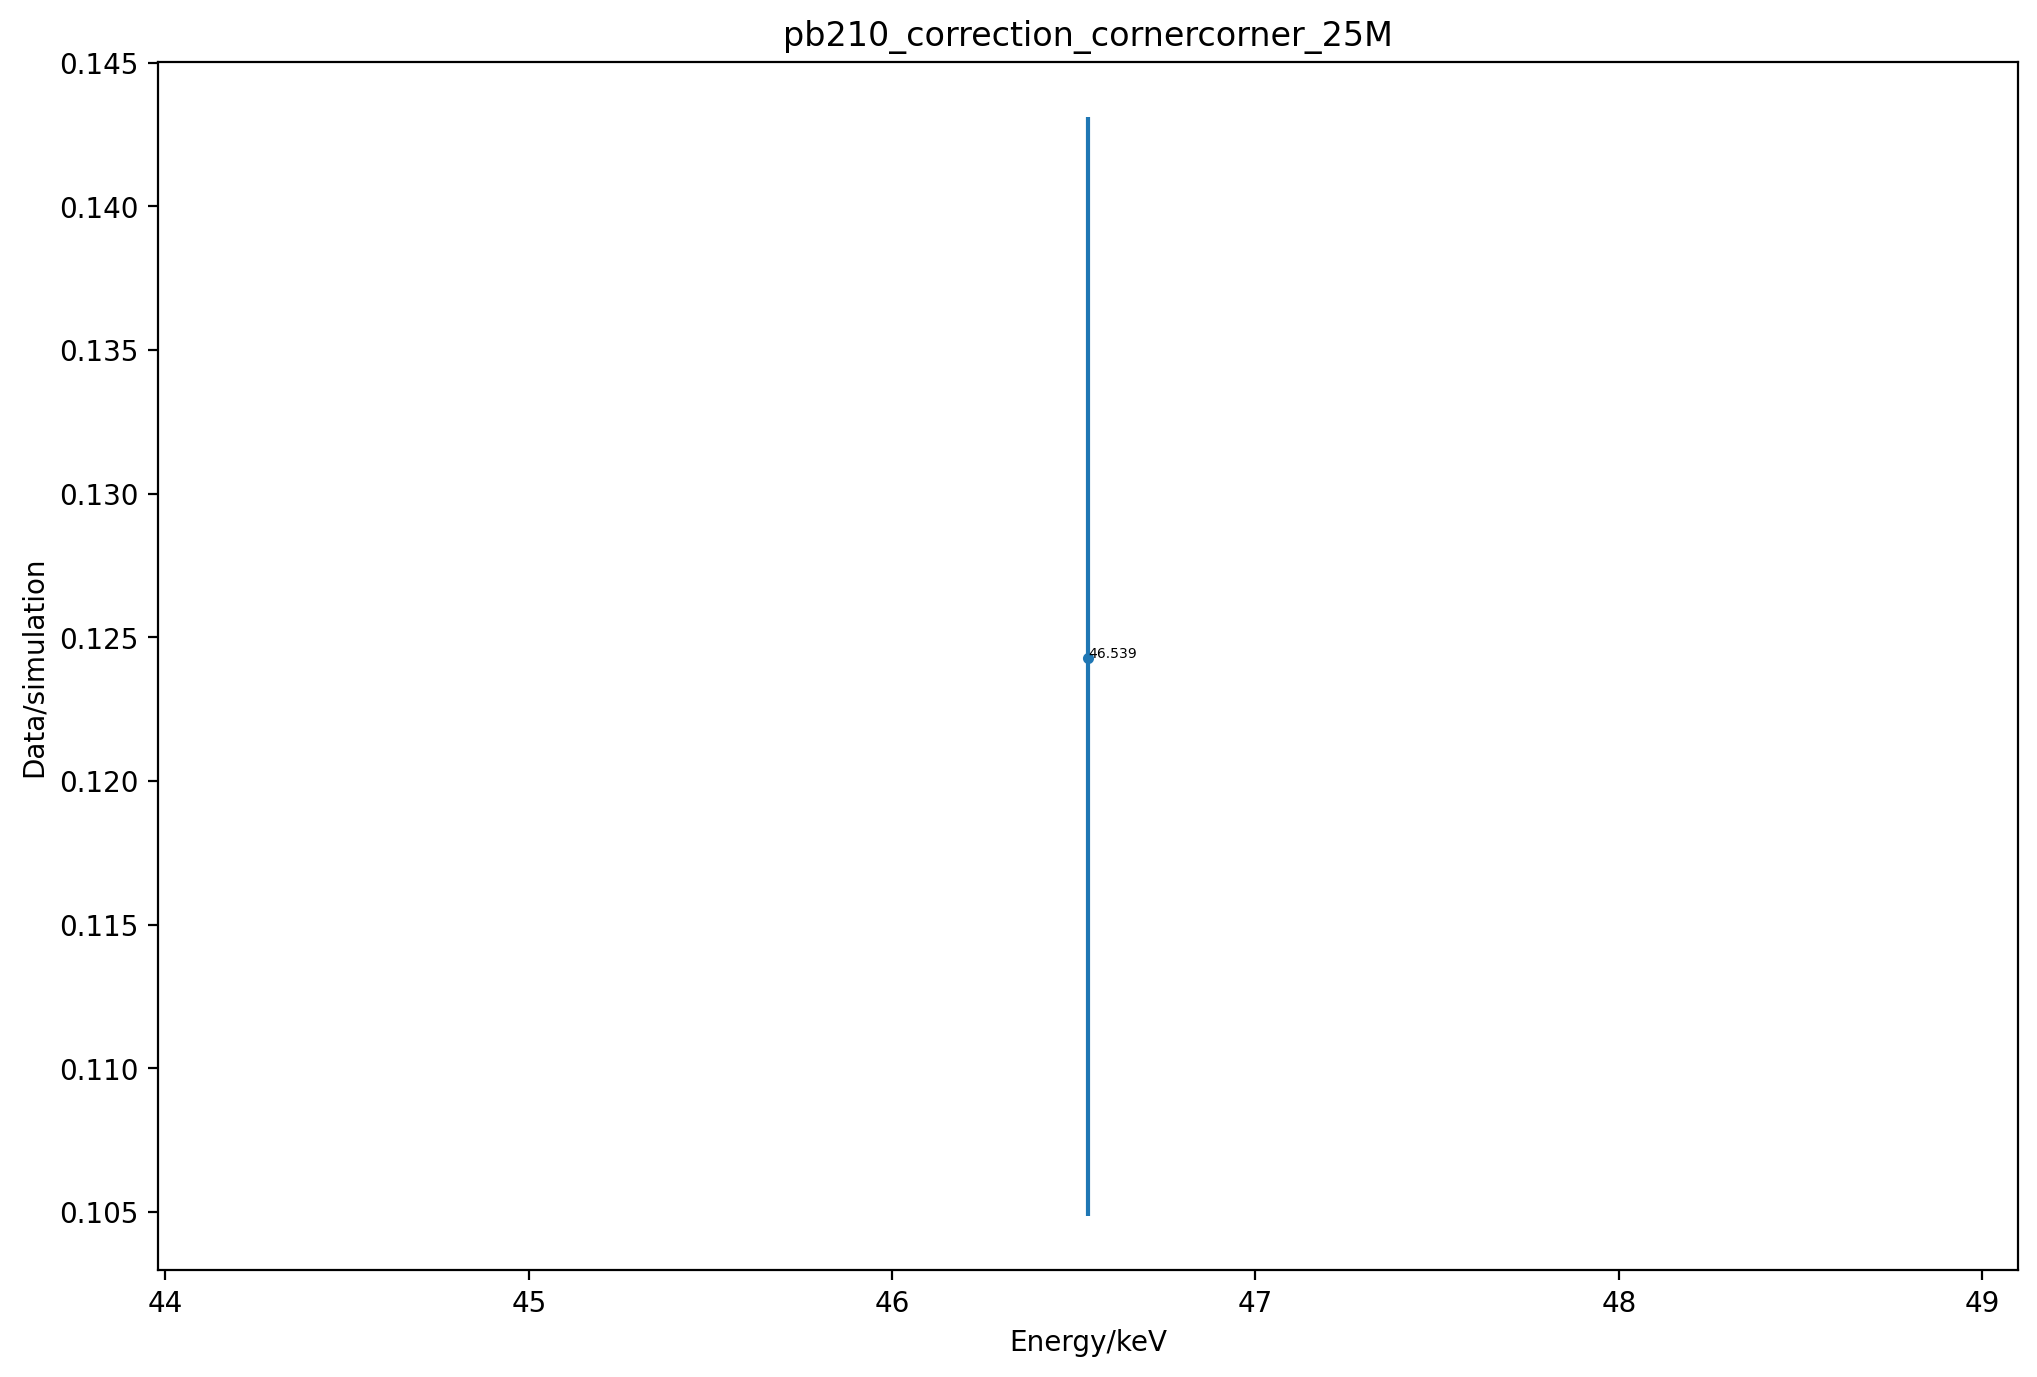


parent               :ra226
correction_data_path :/home/thakur/geivanalysis/my_test/correction_cornercorner_25M.dat
    
plot_save_name: /home/thakur/geivanalysis/my_test/ra226_correction_cornercorner_25M.pdf/.png
file: /home/thakur/geivanalysis/my_test/correction_cornercorner_25M.dat exists
processing ....

Fit data for :ra226

p0: 0.839 p0 error: 0.004

chi^2: 59.037 

plot saved at : /home/thakur/geivanalysis/my_test/ra226_correction_cornercorner_25M.pdf/.png



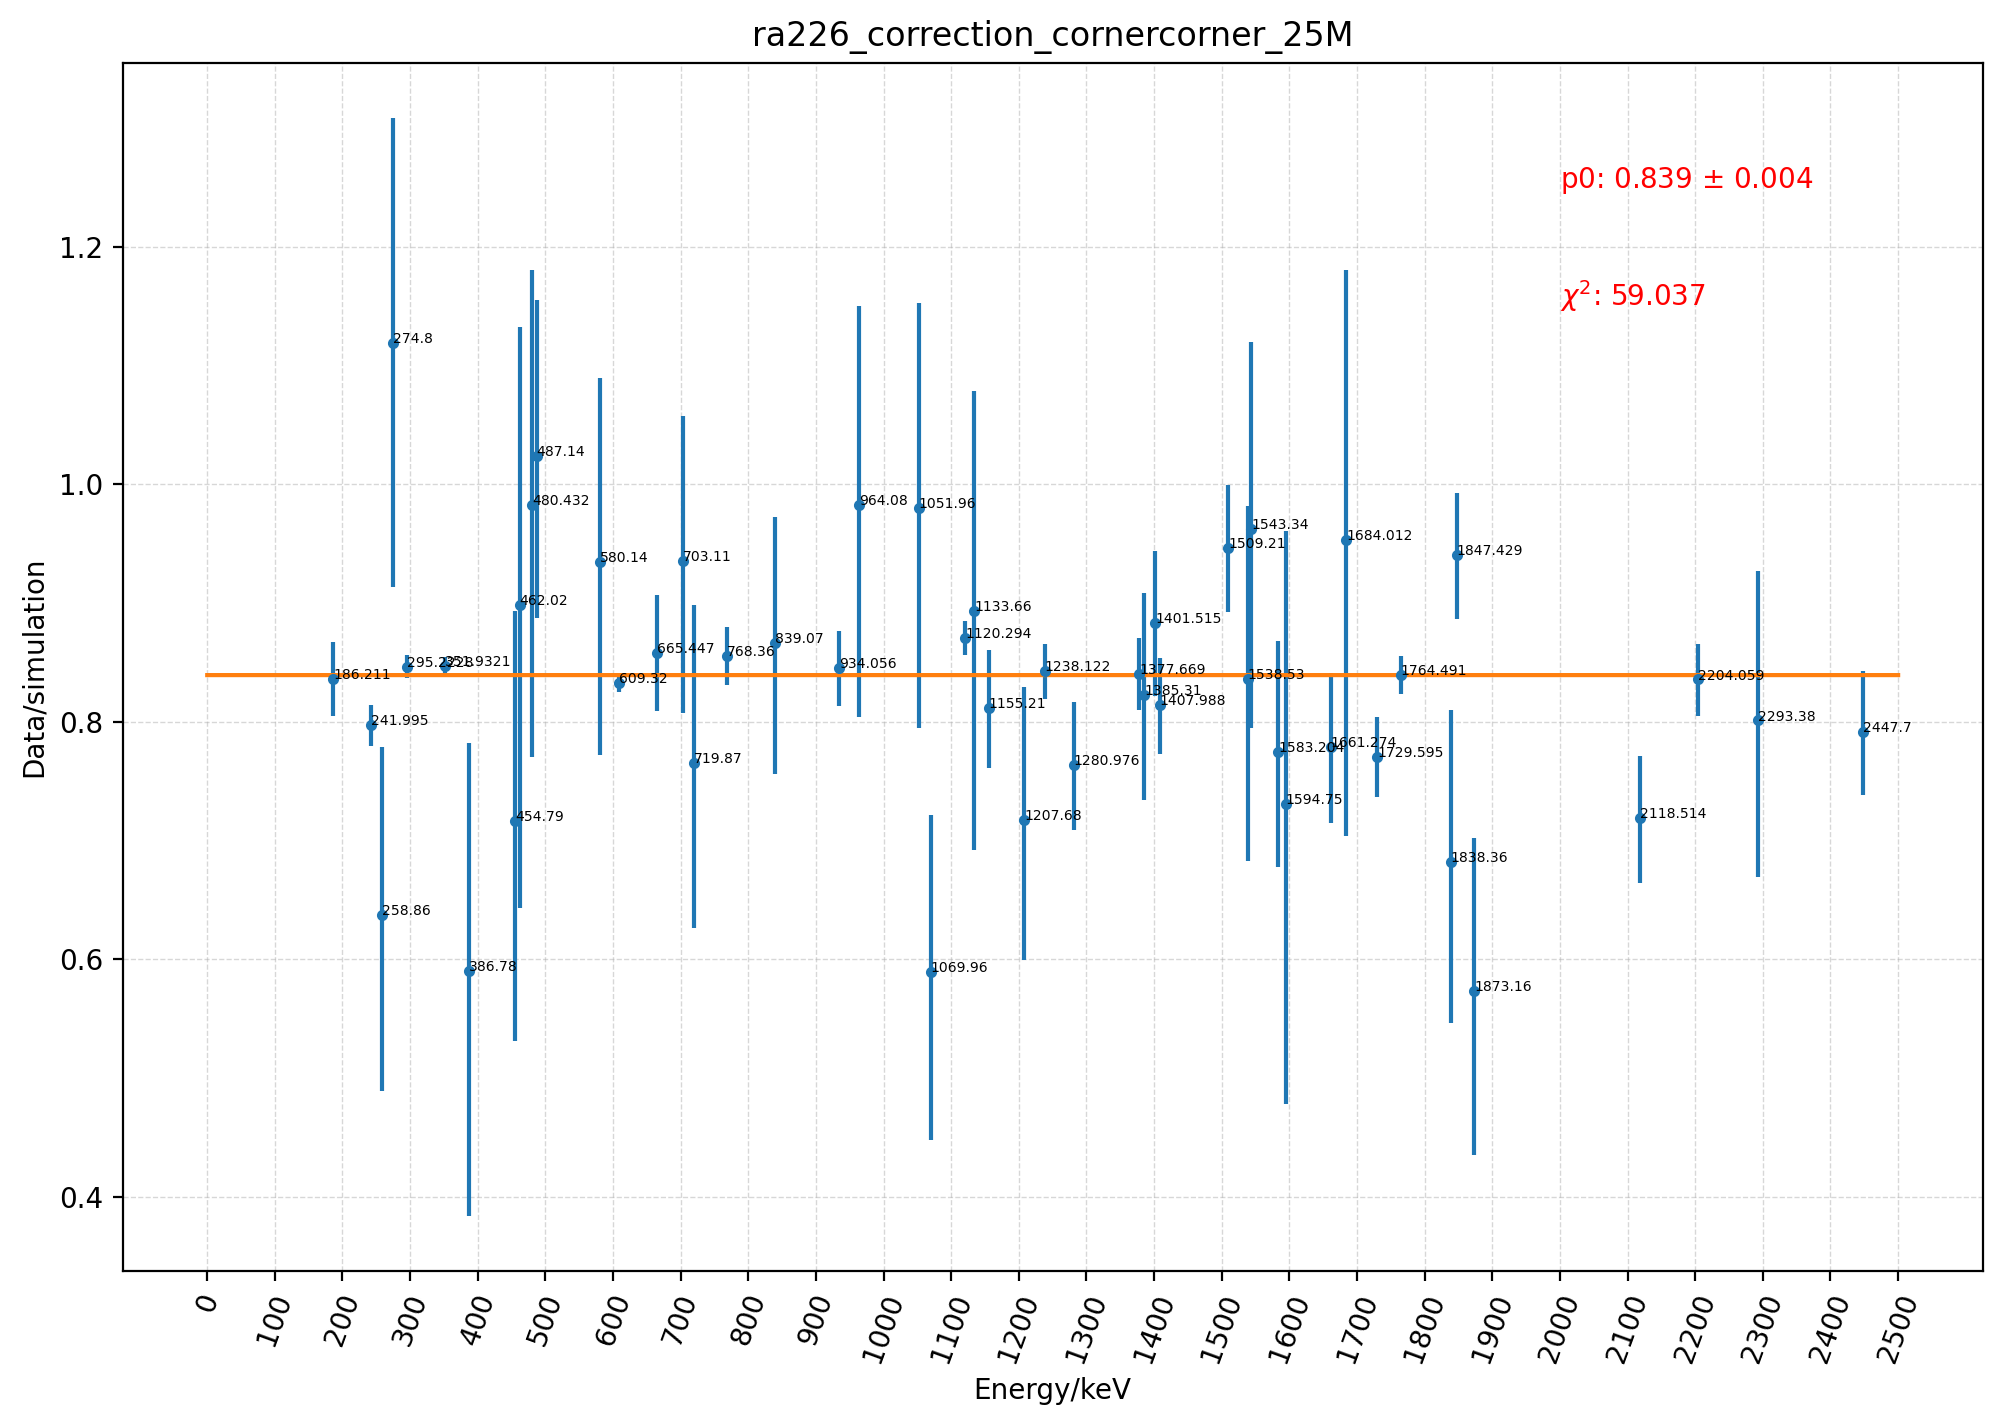


****************************************
Minimizer is Minuit / MigradImproved
Chi2                      =      59.0369
NDf                       =           47
Edm                       =  1.09354e-07
NCalls                    =           32
p0                        =       0.8394   +/-   0.00362397    -0.00362483  +0.00362112   (Minos) 


In [28]:
#remove a file before running as result is appended
! rm -rf "{geiv_source_corr_file}"
for iso in isotopes:get_correction_plot(iso)

In [29]:
! cat "{geiv_source_corr_file}"


am241  -9.000000e+00 1.000000e+00 1.000000e+00 1.505757e-02 1.499151e-02
pb210  -9.000000e+00 1.000000e+00 1.000000e+00 2.014126e-02 2.004590e-02
ra226  8.394002e-01 3.624835e-03 3.621125e-03 -1.497006e-02 -1.504283e-02


In [30]:
! mv -v "{geiv_source_corr_file}" "{dest_path}/source_correction{data_suffix}.dat"

renamed 'source_correction.dat' -> '/home/thakur/geivanalysis/my_test/source_correction_cornercorner_25M.dat'


# PLOT CORRECTIONS

In [65]:


def get_correction_plots(source_correction_data):
    ethresh = 60 # keV
    ###############################################
    # total_simulations='25M'
    # fileloc="/home/thakur/geivanalysis/geiv_cornercorner1122"
    # file_name=f"source_correction_cornercorner1122_{total_simulations}.dat"
    # source_position="cornercorner1122"
    
    print(f'source_correction_data: {source_correction_data}')
    
    f=source_correction_data
    
    pdf_name=f'{dest_path}/source_correction{data_suffix}.pdf'
    pdf_name1=f'{dest_path}/sourcorrection{data_suffix}.pdf'

    #print("Source correction data file:\t",f)

    #check if file exists
    if os.path.exists(f):
        print("file exists: ",f)
        print('processing...!\n')
        time.sleep(5)

        #os.remove(f)
        #print("file removed: ",f)
    else:
        print("file doesnot exist: ",f)
        print('quiting..\n')
        time.sleep(5)
        sys.exit(1)

    #print("file:\t",f)

    data = []
    file = open(f, 'r')
    for line in file:
        print("line:\t",line)
        words = line.split()
        data.append([
            words[0],          # 0: parent
            float(words[1]),   # 1: correction
            float(words[2]),   # 2: uncorrelated error (minus)
            float(words[3]),   # 3: uncorrelated error (plus)
            float(words[4]),   # 4: fractional correlated error (minus)
            float(words[5]) ]) # 5: fractional correlated error (plus)
    for entry in reversed(range(len(data))):
        for e in range(entry):
            # If this entry's isotope and energy match a later one, then remove it.
            if data[e][0] == data[entry][0]:
                data.remove(data[e])
                break

    # Make isotope names nice for axis labels.
    parents = []
    for d in data:
        parents.append(d[0])
    for p in range(len(parents)):
        parents[p] = parents[p][0].upper()+parents[p][1]+'-'+parents[p][2:]
    xs = numpy.arange(0, len(parents))

    for entry in range(len(data)):
        data[entry] = [0] + data[entry][1:] # remove non-floats (isotope names)
    data = numpy.array(data)

    c   = data[:,1]
    lo  = data[:,2]
    hi  = data[:,3]

    # Add in source activity error.
    lo2  = lo
    hi2  = hi
    lo2  = lo2/data[:,1] # why does /= now work here
    lo2 /= data[:,1]
    lo2 *= lo2
    lo2 += data[:,4]*data[:,4]
    lo2  = numpy.sqrt(lo2)
    lo2 *= data[:,1]
    hi2  = hi2/data[:,1] # why does /= now work here
    hi2 *= hi2
    hi2 += data[:,5]*data[:,5]
    hi2  = numpy.sqrt(hi2)
    hi2 *= data[:,1]

    # Remove sources with lines only below threshold (at least for now).
    keep = []
    for d in range(len(data)):
        if data[d][1] > 0:
            keep.append(d)
    c   =  c[keep]
    lo  = lo[keep]
    hi  = hi[keep]
    lo2 = lo2[keep]
    hi2 = hi2[keep]
    x   = xs[keep]

    pyplot.errorbar(x, c, yerr=[lo, hi], fmt='.' )
    pyplot.ylabel('Data/simulation')
    pyplot.xlim(xs[0]-0.5, xs[-1]+0.5)
    pyplot.xticks(xs, parents)
    #pyplot.ylim(0.0, 1.2)
    pyplot.autoscale(enable=True,axis='y')
    pyplot.title(f"correction{data_suffix}")

    pol0  = ROOT.TF1('pol0','[0]',      xs[0]-0.5, xs[-1]+0.5)
    pol0.SetParameter(0,1)
    pol1  = ROOT.TF1('pol1','[0]+[1]*x',xs[0]-0.5, xs[-1]+0.5)
    pol1.SetParameters(1,0)

    graph = ROOT.TGraphAsymmErrors( len(x),
                                    array.array('d', x),
                                    array.array('d', c),
                                    0,
                                    0,
                                    array.array('d', lo),
                                    array.array('d', hi) )
    pol0.SetParameter(0,0.9)
    result = graph.Fit('pol0', 'remqs', '', xs[0]-1, xs[-1]+1)
    ROOT.gStyle.SetOptFit(1011)
    result.Print()
    xs = numpy.linspace(xs[0]-1, xs[-1]+1, num=99)
    ys = []
    for x in xs:
        ys.append( pol0.Eval(x) )
    pyplot.plot(xs, ys)

    pyplot.savefig(pdf_name, bbox_inches='tight')
    pyplot.savefig(pdf_name.replace('.pdf','.png'), bbox_inches='tight')
    print(f'{pdf_name}/.png created!')
    pyplot.clf()

    xs = numpy.arange(0, len(parents))
    x  = xs[keep]
    pyplot.errorbar(x, c, yerr=[lo2, hi2], fmt='.' )
    pyplot.ylabel('Data/simulation')
    pyplot.xlim(xs[0]-0.5, xs[-1]+0.5)
    pyplot.xticks(xs, parents)
    #pyplot.ylim(0.0, 1.2) #ylim(bottom,top)
    pyplot.autoscale(enable=True,axis='y')
    pyplot.title(f"correction-correlated{data_suffix}")

    graph = ROOT.TGraphAsymmErrors( len(x),
                                    array.array('d',x),
                                    c, 0, 0, lo2, hi2 )
    pol0.SetParameter(0,0.9)
    result = graph.Fit('pol0', 'remqs', '', xs[0]-1, xs[-1]+1)
    result.Print()
    #show the parameters in the graph
    ROOT.gStyle.SetOptFit(1011)
    xs = numpy.linspace(xs[0]-1, xs[-1]+1, num=99)
    ys = []
    for x in xs:
        ys.append( pol0.Eval(x) )
    pyplot.plot(xs, ys)

    pyplot.savefig(pdf_name1, bbox_inches='tight')
    pyplot.savefig(pdf_name1.replace('.pdf','.png'), bbox_inches='tight')
    print(f"\n{pdf_name1}/.png created")



source_correction_data: /home/thakur/geivanalysis/my_test/source_correction_cornercorner_25M.dat
file exists:  /home/thakur/geivanalysis/my_test/source_correction_cornercorner_25M.dat
processing...!

line:	 am241  -9.000000e+00 1.000000e+00 1.000000e+00 1.505757e-02 1.499151e-02

line:	 pb210  -9.000000e+00 1.000000e+00 1.000000e+00 2.014126e-02 2.004590e-02

line:	 ra226  8.394002e-01 3.624835e-03 3.621125e-03 -1.497006e-02 -1.504283e-02

/home/thakur/geivanalysis/my_test/source_correction_cornercorner_25M.pdf/.png created!

/home/thakur/geivanalysis/my_test/source_correction_cornercorner_25M.pdf/.png created


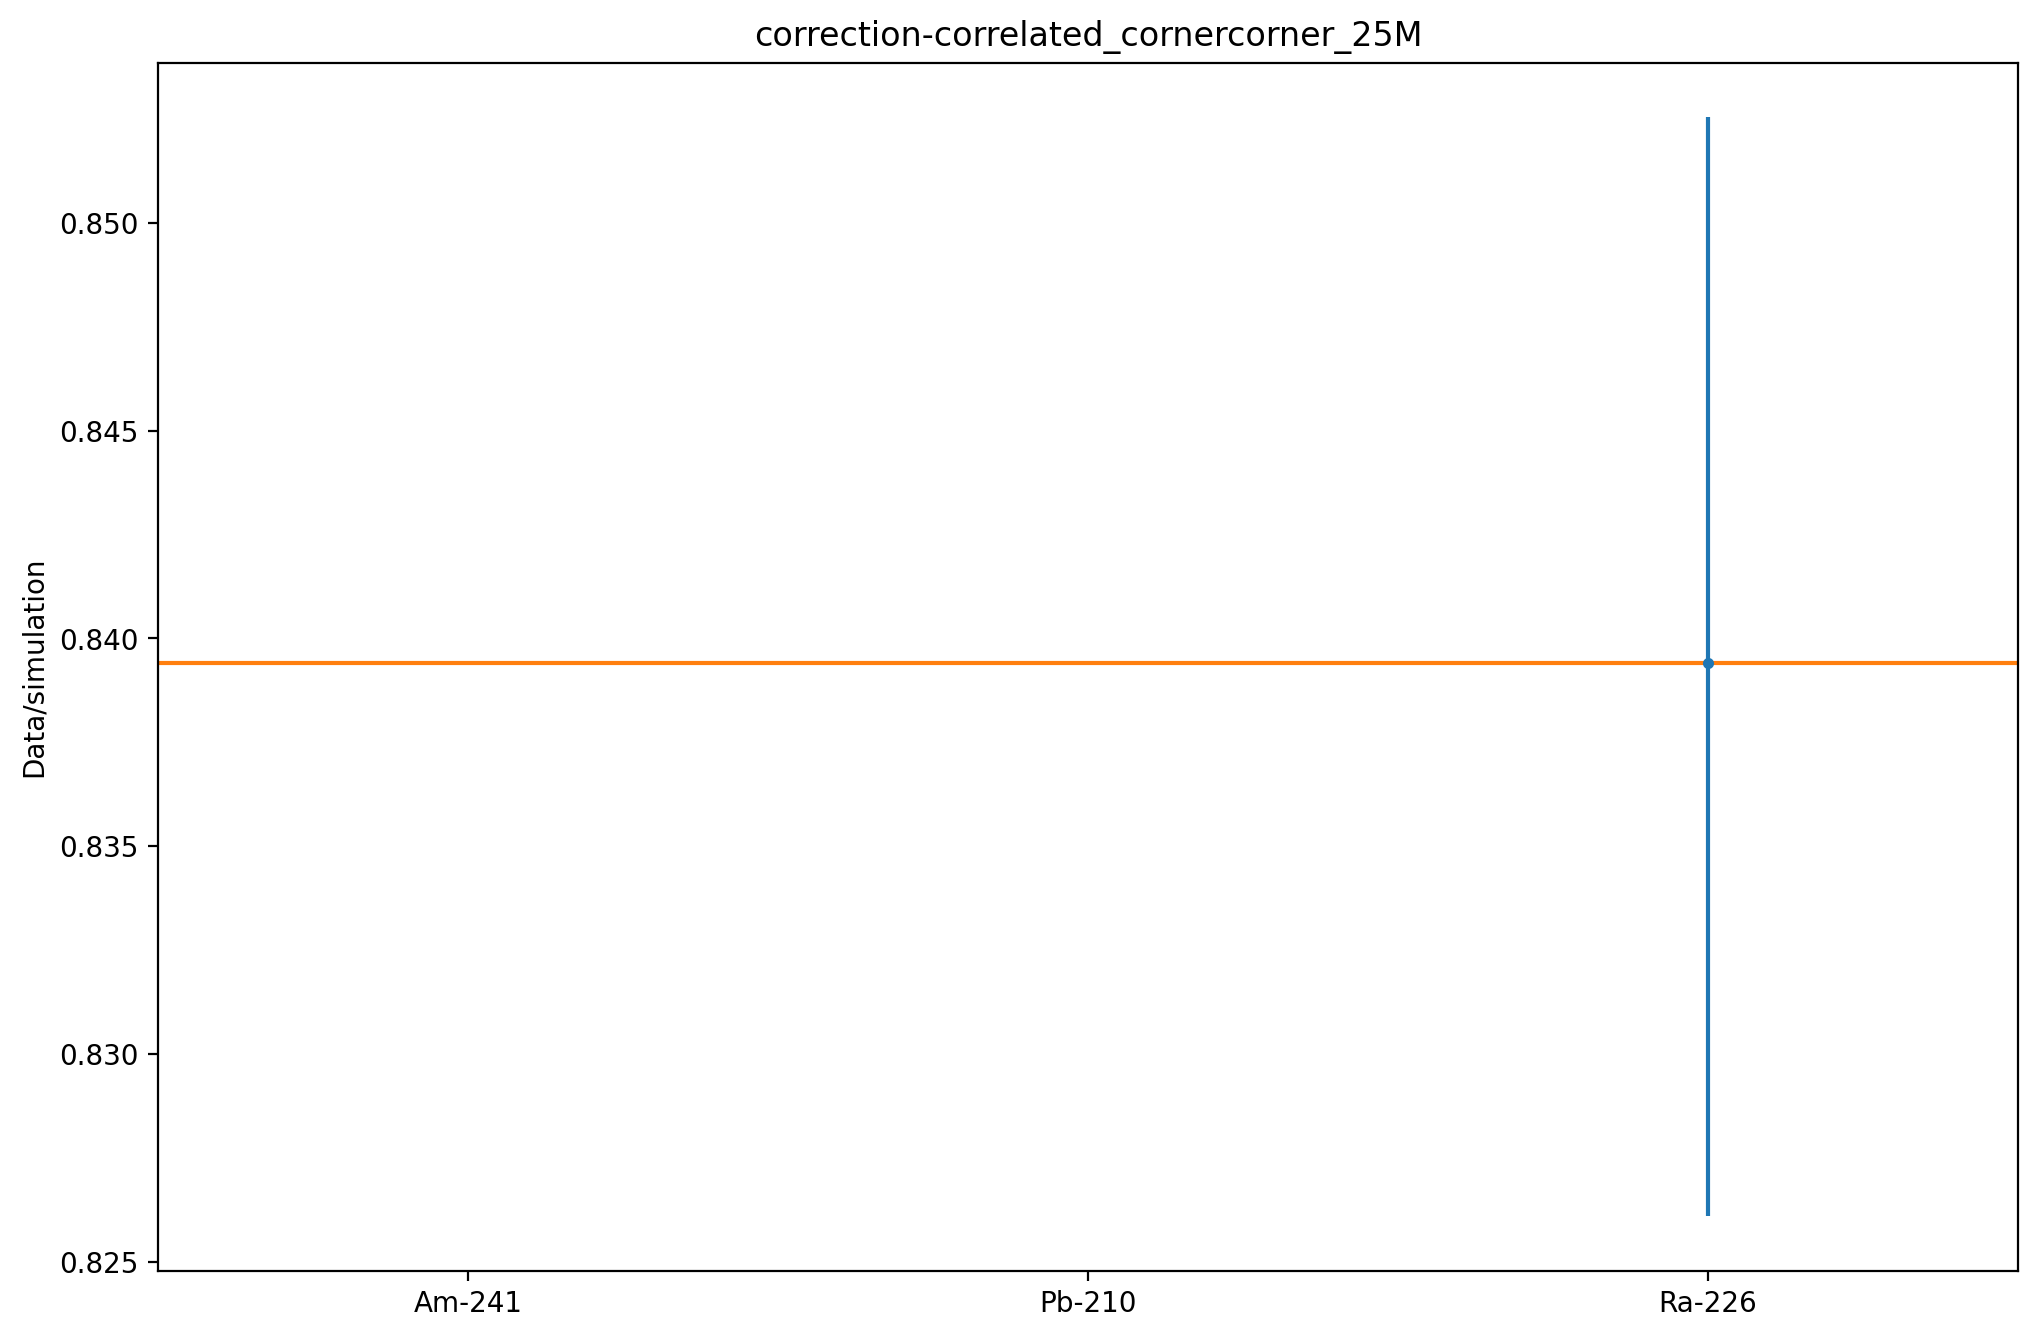


****************************************
Minimizer is Minuit / MigradImproved
Chi2                      =  1.35362e-23
NDf                       =            0
Edm                       =  1.60024e-15
NCalls                    =           33
p0                        =       0.8394   +/-   0.00362298    -0.00362484  +0.00362112   (Minos) 

****************************************
Minimizer is Minuit / MigradImproved
Chi2                      =  6.76609e-18
NDf                       =            0
Edm                       =  2.35686e-14
NCalls                    =           45
p0                        =       0.8394   +/-   0.0132109     -0.0132872   +0.0131359    (Minos) 


In [67]:
source_correction_data=f'{dest_path}/source_correction{data_suffix}.dat'
get_correction_plots(source_correction_data=source_correction_data)

# PLOT EFFICIENCY

In [55]:

def get_efficiency_plot(data_file=combined_data_file,sim_file=combined_sim_file):
    '''
    produce efficiency plot for give data and simulation values
    '''
    print(f'''
data_file: {data_file}
sim_file : {sim_file}
    ''')
    
    #check if file exists
    check_file(data_file)
    check_file(sim_file)
    
    data = []
    file = open(data_file, 'r')
    for line in file:
        words = line.split()
        if len(sys.argv) > 1:
               if words[0] != parent:
                   continue
        data.append([
            [ words[0],         # 0: parent
              words[1] ],       # 0: isotope
            float(words[ 2]),   # 1: energy
            float(words[ 3]),   # 2: efficiency
            float(words[ 4]),   # 3: uncorrelated error (minus)
            float(words[ 5]),   # 4: uncorrelated error (plus)
            float(words[ 8]),   # 5: total activity error (minus)
            float(words[ 9]) ]) # 6: total activity error (plus)
    for entry in reversed(range(len(data))):
        for e in range(entry):
            # If this entry's isotope and energy match a later one, then remove it.
            if data[e][0] == data[entry][0] and data[e][1] == data[entry][1]:
                data.remove(data[e])
                break

    # Separate the different daughter isotopes.
    iso = [[]]
    for d in data:
        if len(iso[0]) == 0:
            iso[0].append(d)
            continue
        for t in iso:
            if t[0][0][0] == d[0][0]:
                t.append(d)
                break
        else:
            iso.append([])
            iso[-1].append(d)

    isotopes = [] # names of parent isotopes
    for i in iso:
        isotopes.append(i[0][0][0])

    # Plot, separately, each isotope of this parent.
    for i in range(len(iso)):
        for entry in range(len(iso[i])):
            iso[i][entry] = [0] + iso[i][entry][1:] # remove non-floats (isotope names)
        data = numpy.array(iso[i])
        pyplot.errorbar(data[:,1], 100*data[:,2], yerr=[100*data[:,3], 100*data[:,4]], fmt='.', zorder=11, ms=2, elinewidth=1 )

    # Plot all simulation efficiencies.
    data = []
    file = open(sim_file, 'r')
    for line in file:
        words = line.split()
        data.append([
            [ words[0],         # 0: parent
              words[1] ],       # 0: isotope
            float(words[ 2]),   # 1: energy
            float(words[ 3]),   # 2: efficiency
            float(words[ 4]),   # 3: uncorrelated error (minus)
            float(words[ 5]) ]) # 4: uncorrelated error (plus)
    for entry in reversed(range(len(data))):
        for e in range(entry):
            # If this entry's isotope and energy match a later one, then remove it.
            if data[e][0] == data[entry][0] and data[e][1] == data[entry][1]:
                data.remove(data[e])
                break

    for entry in range(len(data)):
        data[entry] = [0] + data[entry][1:] # remove non-floats (isotope names)
    data = numpy.array(data)
    pyplot.errorbar(data[:,1], 100*data[:,2], yerr=[100*data[:,3], 100*data[:,4]], fmt='.', color='black',zorder=10, ms=3, elinewidth=1 )






    pyplot.xlabel('Energy/keV')
    pyplot.ylabel('Efficiency/%')
    pyplot.xlim(0, 2500)
    pyplot.ylim(0,    1)
    pyplot.title(f'efficiency_{data_suffix}')
    plot_save=f'{dest_path}/efficiency{data_suffix}.pdf'
    
    print(f'plot_saved_as: {plot_save}/.png\n')

    pyplot.savefig(plot_save,bbox_inches='tight')
    pyplot.savefig(plot_save.replace('.pdf','.png'),bbox_inches='tight')
    pyplot.show()



data_file: /home/thakur/geivanalysis/my_test/data_cornercorner_25M.dat
sim_file : /home/thakur/geivanalysis/my_test/sim_cornercorner_25M.dat
    
file: /home/thakur/geivanalysis/my_test/data_cornercorner_25M.dat exists ... processing ...

file: /home/thakur/geivanalysis/my_test/sim_cornercorner_25M.dat exists ... processing ...

plot_saved_as: /home/thakur/geivanalysis/my_test/efficiency_cornercorner_25M.pdf/.png



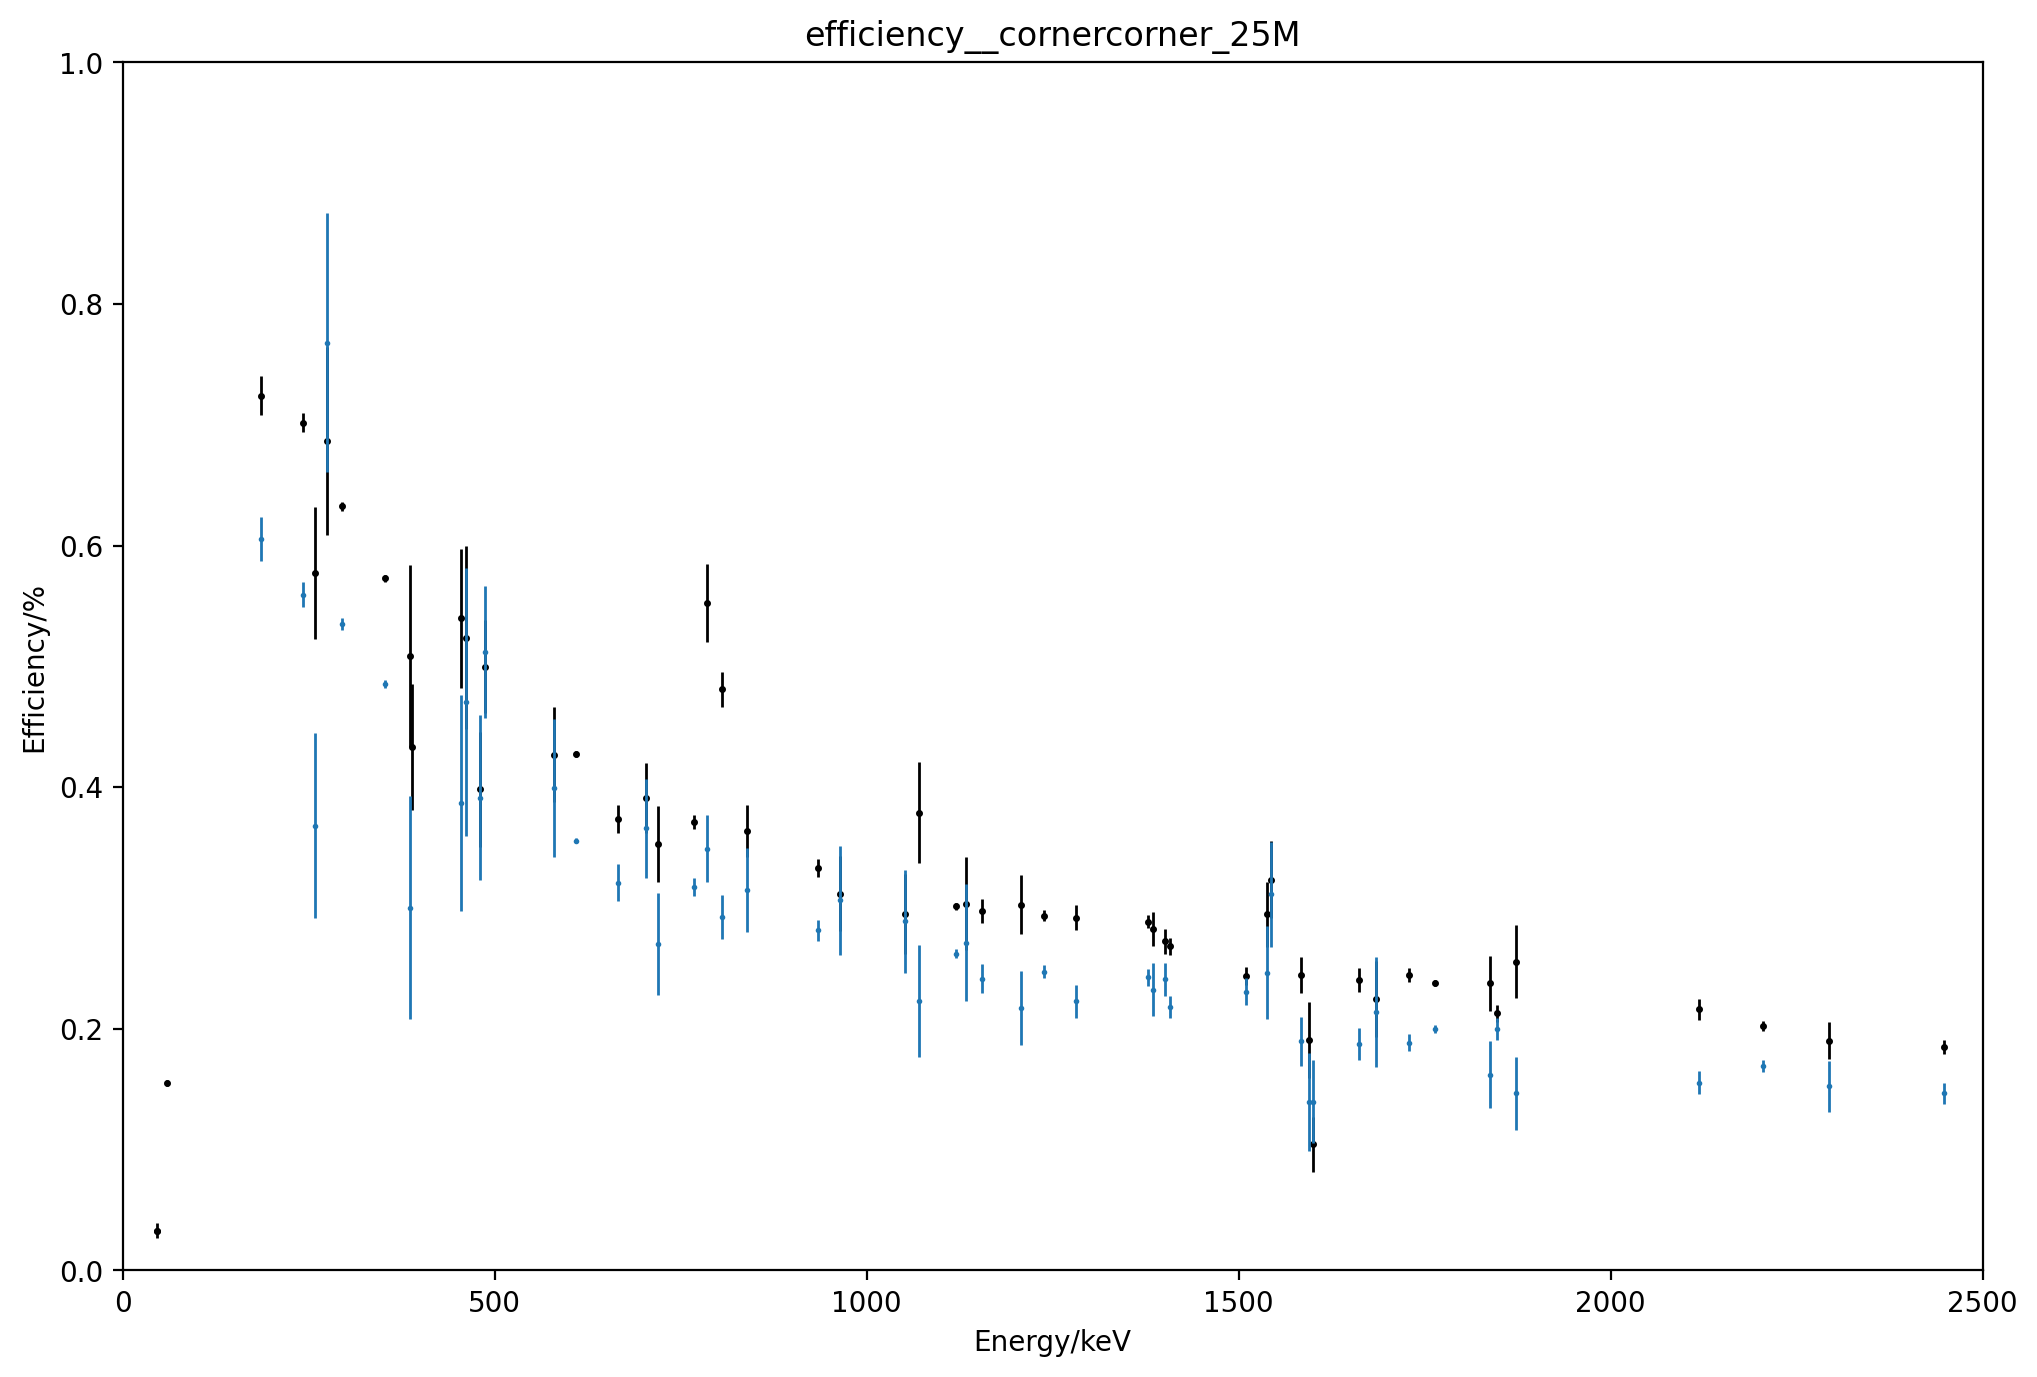

In [56]:
get_efficiency_plot()